# Raod Map

We want to:

- [x] plot the ACFs for each **ensAvg** **property** individually as a **subplot** in a **space** **figure**
- [ ] make the ACF plotters more efficient.


# General Settings

## Importing packages

In [2]:
# Importing necessary packages:

from glob import glob
import numpy as np
import pandas as pd

import itertools

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from polyphys.visualize import plotter
from polyphys.visualize import tuner
from polyphys.manage.parser import SumRule, TransFoci
from polyphys.manage import organizer
from polyphys.analyze import measurer
from polyphys.manage import utilizer

# Project details
#project = 'SumRule'
project = 'TransFoci'
project_details ={
    'SumRule':{
        'parser': SumRule,
        'space_pat': 'N*D*ac*',
        'hierarchy': 'N*',
        'space_hierarchy': 'N*',
        'attributes': ['space', 'ensemble_long', 'ensemble', 'nmon', 'dcyl',
                       'dcrowd','phi_c_bulk'
                      ],
        'time_varying_props': [ 'asphericityTMon', 'fsdTMon', 'gyrTMon',
                               'rfloryTMon','shapeTMon'],
        'equil_measures': [np.mean, np.var, measurer.sem],
        'equil_attributes': ['space', 'ensemble_long', 'ensemble', 'nmon',
                             'dcyl','dcrowd', 'phi_c_bulk',
                             'phi_c_bulk_round'
                            ],
        'equil_properties': ['asphericityMon-mean', 'asphericityMon-var',
                             'asphericityMon-sem', 'fsdMon-mean',
                             'fsdMon-var', 'fsdMon-sem', 'gyrMon-mean',
                             'gyrMon-var', 'gyrMon-sem', 'rfloryMon-mean',
                             'rfloryMon-var', 'rfloryMon-sem',
                             'shapeMon-mean', 'shapeMon-var', 'shapeMon-sem']
    },
    'TransFoci':{
        'parser': TransFoci,
        'space_pat': 'ns*nl*al*D*ac*',
        'hierarchy': 'eps*',
        'space_hierarchy': 'ns*',
        'attributes': ['space', 'ensemble_long', 'ensemble', 'nmon_small',
                       'nmon_large','dmon_large', 'dcyl', 'dcrowd',
                       'phi_c_bulk'
                      ],
        'time_varying_props': ['asphericityTMon', 'fsdTMon', 'gyrTMon',
                               'shapeTMon'],
        'equil_measures': [np.mean, np.var, measurer.sem],
        'equil_attributes': ['ensemble_long', 'ensemble', 'space', 'dcyl',
                             'dmon_large', 'nmon_large', 'nmon_small',
                             'dcrowd', 'phi_c_bulk', 'phi_c_bulk_round'],
        'equil_properties': ['asphericityMon-mean', 'asphericityMon-var',
                             'asphericityMon-sem', 'fsdMon-mean',
                             'fsdMon-var', 'fsdMon-sem', 'gyrMon-mean',
                             'gyrMon-var', 'gyrMon-sem', 'shapeMon-mean',
                             'shapeMon-var', 'shapeMon-sem']
    }
}

properties_labels =  {
    'SumRule': {
        'rfloryMon-norm': {
            'name': 'Flory radius',
            'symbol': r'$\frac{{R_F(\phi_c)}}{{R_{F,0}}}$',
            'color': 'firebrick'
        },
        'gyrMon-norm': {
            'name': 'Radius of gyration',
            'symbol': r'$\frac{{R_g(\phi_c)}}{{R_{g,0}}}$',
            'color':'steelblue'
        },
        'fsdMon-norm': {
            'name': 'Furthermost distance',
            'symbol': r'$\frac{{L(\phi_c)}}{{L_{0}}}$',
            'color': 'forestgreen'
        },
        'asphericityMon-norm': {
            'name': 'Asphericity',
            'symbol': r'$\frac{{\Delta(\phi_c)}}{{\Delta_{0}}}$',
            'color': 'goldenrod'
        },
        'shapeMon-norm': {
            'name': 'Shape parameter',
            'symbol': r'$\frac{{S(\phi_c)}}{{S_{0}}}$',
            'color': 'orchid'
        },
        'rPhi': {
            'name': 'Radial volume fraction',
            'symbol': r'$\phi(r)$',
        },
        'zPhi': {
            'name': 'Longitudinal volume fraction',
            'symbol': r'$\phi(z)$'
        },
        'rRho': {
            'name': 'Radial number density',
            'symbol': r'$\rho(r)$'
        },
        'zRho': {
            'name': 'Longitudinal number density',
            'symbol': r'$\rho(z)$'
        },
        'rPhi-norm': {
            'name': 'Normalized radial volume fraction',
            'symbol': r'$\phi(r)$'
        },
        'zPhi-norm': {
            'name': 'Normalized longitudinal volume fraction',
            'symbol': r'$\phi(z)$',
        },
        'rRho-norm': {
            'name': 'Normalized radial number density',
            'symbol': r'$\rho(r)$'
        },
        'zRho-norm': {
            'name': 'Normalized longitudinal number density',
            'symbol': r'$\rho(z)$'
        }
    },
    'TransFoci':{
        'gyrMon-norm': {
            'name': 'Radius of gyration',
            'symbol': r'$\frac{R_g(\phi_c)}{R_{g,0}}$',
            'color':'steelblue'
        },
        'fsdMon-norm': {
            'name': 'Furthermost distance',
            'symbol': r'$\frac{L(\phi_c)}{L_{0}}$',
            'color': 'forestgreen'
        },
        'asphericityMon-norm': {
            'name': 'Asphericity',
            'symbol': r'$\frac{\Delta(\phi_c)}{\Delta_{0}}$',
            'color': 'goldenrod'
        },
        'shapeMon-norm': {
            'name': 'Shape parameter',
            'symbol': r'$\frac{S(\phi_c)}{S_{0}}$',
            'color': 'orchid'
        },
        'asphericityMon-mean': {
            'name': 'Asphericity',
            'symbol': r'$\Delta(\phi_c)$',
            'color': 'goldenrod'
        },
        'shapeMon-mean': {
            'name': 'Shape parameter',
            'symbol': r'$S(\phi_c)$',
            'color': 'orchid'
        },
        'bondsHistFoci-norm': {
            'name': 'Probability distribution function of direct bonds',
            'symbol': r'$\mathcal{P}(x_b)$',
            'color': 'orchid'
        },
        'clustersHistFoci-norm': {
            'name': 'Probability distribution function of clusters',
            'symbol': r'$\mathcal{P}(x_c)$',
            'color': 'orchid'
        },
        'pairDistHistFoci': {
            'name': 'Frequency distribution of pair distance',
            'symbol': r'$\mathcal{H}(r)$',
            'color': 'orchid'
        },
        'pairDistRdfFoci': {
            'name': 'Radial distribution function of pair distance',
            'symbol': r'$\mathcal{P}(r)$',
            'color': 'orchid'
        },
        'pairDistRdfGenDistAvg': {
            'name': 'Radial distribution function of pair distance averaged over Genomic distances',
            'symbol': r'$\mathcal{P}(r)$',
            'color': 'orchid'
        },
        'pairDistTFoci': {
            'name': 'Pair distance',
            'symbol': r'$r(t)$',
            'color': 'orchid'
        },
               'zPhi': {
            'name': 'Longitudinal volume fraction',
            'symbol': r'$\phi(z)$'
        },
        'rRho': {
            'name': 'Radial number density',
            'symbol': r'$\rho(r)$'
        },
        'zRho': {
            'name': 'Longitudinal number density',
            'symbol': r'$\rho(z)$'
        },
        'rPhi-norm': {
            'name': 'Normalized radial volume fraction',
            'symbol': r'$\phi(r)$'
        },
        'zPhi-norm': {
            'name': 'Normalized longitudinal volume fraction',
            'symbol': r'$\phi(z)$'
        },
        'rRho-norm': {
            'name': 'Normalized radial number density',
            'symbol': r'$\rho(r)$'
        },
        'zRho-norm': {
            'name': 'Normalized longitudinal number density',
            'symbol': r'$\rho(z)$'
        }
    }
}
attr_labels = {
    "phi_c_bulk_round": "$\phi_c$",
    "time": "$\hat{{t}}$",
    "time_norm": "$\hat{{t}}/\hat{{t}}^{{max}}$",
    "lags": "$\hat{t}_{lags}$",
    "dmon_large": "${{a_l}}/{{a}}$",
    "dcrowd": "${{a_c}}/{{a}}$",
    "dcyl": "${{D}}/{{a}}$",
    "nmon_small": "$n_s$",
    "nmon_large": "$n_l$",
    'phi_c_bulk_norm': "${a\phi_c}/{a_c}$",
    'genomic_distance':  '$\Delta n$',
    'bin_center':'$r$',
    'bin_center-norm':'${{r}}/{{r_{max}}}$',
    'bin_center-r':'$r$',
    'bin_center-norm-r':'${{2r}}/{{D}}$',
    'bin_center-z':'$z$',
    'bin_center-norm-z':'${{z}}/{{z_{max}}}$',
    'bin_center-theta':'$\theta$',
    'bin_center-norm-theta':'${{\theta}}/{{\pi}}$',
    'nmon':'$N$',
    'nmon_large':'$N_l$',
}


In [3]:
flar_cmap = mpl.colors.ListedColormap(sns.cm._flare_lut)
flare_cmap_cut = tuner.truncated_colormap(flar_cmap,  min_value=0.01, max_value=1, ncolors=200)
mpl.cm.register_cmap("flare_cmap_cut", flare_cmap_cut)

In [ ]:
# loading databases:
#analysis_db = '/Users/amirhsi/OneDrive - University of Waterloo/PhD Research/Jupyter/Datasets'
analysis_db = '/Users/amirhsi_mini/research_data/analysis'
#analysis_db = '../../Datasets' # relative
#project = 'TransFoci'
project = 'SumRule'
phase='ensAvg'
geometry='biaxial'
group = "bug"
species = "Mon"
space_dbs = glob(analysis_db + project_details[project]['space_pat'])

# Auto-correlation functions

##### Note: In a given space, ensAvg groups differs in their values of bulk volume fraction of crowders (column name: phi_c_bulk)

### Theoretical background:

Below, all the several definitions of autocorrelation function (acf) in the literature are listed. Assuming $A(t)$ is a discrete time-varying property of interest and is collected every $M$ timesteps in a molecular dynamics simulation with the time step $\Delta t$ and time unit $\hat{t}$. First, we define the mean (or average) and unbiased variance of $A(t)$ as what follows

$$\langle A\rangle=\frac{1}{t_{max}}\sum_{t=1}^{t_{max}}A(t)$$
$$\sigma^2_A=\langle A^2 \rangle-\langle A\rangle^2=\frac{1}{t_{max}-1}\sum_{t=1}^{t_{max}}(A(t)-\langle A\rangle)^2$$

where $t_{max}$ is the total number of collected cofigurations or timesteps, or simply the size of $A(t)$, implying the total number of simulated timesteps is $t_{max}\times M$. Given this definition, the acf has been defined in the following ways in the literature:

1. Allen and Tildesley define the *non-normalized* acf in "Computer simulation of liquids - 2017" as

$$c_{AA}(h) = \frac{1}{h_{max}}\sum_{h_0=1}^{h_{max}}A(h_0)A(h_0+h)$$

where $h_{max}=\frac{t_{max}-1}{h}$

2. *1989 - Murat M Greet GS - Structure of a Grafted Polymer Brush A Molecular Dynamics Simulation* defines the acf in "Structure of a Grafted Polymer Brush A Molecular Dynamics Simulation - 1989" as

$$c_{AA}(h) =\frac{\langle (A(h)-\langle A \rangle)(A(0)-\langle A \rangle)\rangle}{\sigma^2_A}=\frac{\langle A(h)A(0)\rangle-\langle A \rangle \langle A(0) \rangle}{\sigma^2_A}$$

See the rest of this artciel to see how correlation time is calculated. See the rest of this artciel to see how correlation time is calculated.

3. In *1989 - Grest GS Kremer K Witten TA et el - Relaxation of Self-Entangled Many-Arm Star Polymers, 1987 - Grest GS Kremer K Witten TA - Structure of Many-Arm Star Polymers A Molecular Dynamics Simulation, and 1977 - Kranbuehl DE Verdier PH - Relaxation of the aspherical shapes of random-coil polymer chains*, the acf is

$$c_{AA}(h) =\frac{\langle A(h)A(0)\rangle-\langle A \rangle^2}{\sigma^2_A}$$

where the average is performed over the initial time steps $h=h_0=0$ taken every $K$ timesteps. Kranbuehl and Verdier runs the whole simulation several times the relaxation time of the end-to-end length.

4. In *1978 - Rapaport DC - Molecular dynamics simulation of polymer chains with excluded volum, and 1979 - Bishop M Ceperley D Frisch HL - Molecular dynamics of polymeric systems* the afc is given by

$$c_{AA}(h) =\frac{\langle A(h)A(h_0+h)\rangle-\langle A(h_0) \rangle^2}{\sigma^2_A(h_0)}$$

where

$$\sigma^2_A(h_0)=\langle A(h_0)^2 \rangle-\langle A(h_0)\rangle^2$$

The averaging should be done over ensembles; however, in practice, the ensemble average is replaced by the time average provided that the timesteps or time interval between successvie $h_0$ values are sufficently lagre so the configurations are uncorrelated.

5. *1981 - Bruns W Bansal R - Molecular dynamics study of a single polymer chain in solution* defines the afc as

$$c_{\vec{A}\vec{A}}(h) = \frac{\sum_{h_0=1}^{t_{max}-h}\vec{A}(h_0).\vec{A}(h_0+h)}{\sum_{h_0=1}^{t_{max}-h}\vec{A}^2(h_0)}$$

where $\vec{A}$ is a vector quantity and $h_0$ is summed over $1,1+p,1+2p,\dots$ instead of $h_0=1,2,3,\dots,t_{max}-h$. For a scalar quantity, this definition is used:

$$c_{AA}(h) = \frac{(t_{max}-h)\sum_{h_0=1}^{t_{max}-h}A(h_0)A(h_0+h)-\sum_{h_0=1}^{t_{max}-h}A(h_0)\sum_{h_0=1}^{t_{max}-h}A(h_0+h)}{\sqrt{(t_{max}-h)\sum_{h_0=1}^{t_{max}-h}A^2(h_0)-[\sum_{h_0=1}^{t_{max}-h}A^2(h_0)]^2}-\sqrt{(t_{max}-h)\sum_{h_0=1}^{t_{max}-h}A^2(h_0+h)-[\sum_{h_0=1}^{t_{max}-h}A^2(h_0+h)]^2}}=
\frac{\langle A(h_0)A(h_0+h)\rangle-\langle A(h_0)\rangle\langle A(h_0+h)\rangle}{\sqrt{\langle A^2(h_0)\rangle-\langle A(h_0)\rangle^2}-\sqrt{\langle A^2(h_0+h)\rangle-\langle A(h_0+h)\rangle^2}}$$

6. *Brockwell PJ Davis RA - 2016 - Introduction to Time Series and Forecasting* defines the afc in the following way

$$c_{AA}(h) = \frac{cov_{A}(h)}{\sigma_A^2} = \frac{1}{\sigma_A^2}\frac{1}{t_{max}}\sum_{h_0=1}^{t_{max}-h} [A(h_0+h)-\langle A\rangle][A(h_0)-\langle A\rangle]$$





### How to run this Notebook:

1. Check ((spaces_to_read**
2. Check **group** and **species**.
3. check **database**.
4. delete extra **physical** properties based on the preoject.
5. check **nlags** and **ticks**.
6. check **parser** and **spaces_title**.


### Grouping and filtering

Since the datasets we work with are large, it is a good idea to
- define some filters to ease subsetting the dataframes.
- define distinguishable colors for the volume fraction of crowders as the changing parameter that defines different ensAvg groups in a space
- round the value of this changing parameter.

In [ ]:
acf_space_dbs = [space_db for space_db in space_dbs if
                 space_db.endswith('acf.parquet.brotli')
                ]
space_dbs

In [ ]:
# read data
acf_space_dbs = [space_db for space_db in space_dbs if
                 space_db.endswith('acf.parquet.brotli')
                ]
acf = [pd.read_parquet(space_db) for space_db in acf_space_dbs]
acf = pd.concat(acf,axis=0, ignore_index=True)
acf.reset_index(inplace=True,drop=True)

# a sorted list of unique spaces in the dataset
spaces = acf.loc[:,'space'].drop_duplicates().sort_values()
spaces = sorted(spaces, key = organizer.sort_by_alphanumeric)

# rounding phi_c as facgtors of 0.025:
# add rounded phi_crds to the dataset
divisor = 0.025
round_to = 3
acf['phi_c_bulk_round'] = acf['phi_c_bulk'].apply(
    utilizer.round_up_nearest, args=[divisor, round_to]
)
# phi_c to drop
acf = acf.loc[~acf['phi_c_bulk_round'].isin([0.025, 0.05, 0.075, 0.125, 0.175]),:]
acf.reset_index(inplace=True, drop=True)
# setting colors for unique crd_c
phi_crds = acf.loc[:,'phi_c_bulk_round'].unique()
phi_crds.sort()
flar_cmap = mpl.colors.ListedColormap(sns.cm._flare_lut)
flare_cmap_cut = tuner.truncated_colormap(flar_cmap,  min_value=0.0, max_value=1.0, ncolors=200)
mpl.cm.register_cmap("flare_cmap_cut", flare_cmap_cut)
phi_colors = sns.color_palette("flare_cmap_cut", len(phi_crds))#,as_cmap=True)
# add rounded phi_crds to the dataset
# Define a list of unique physical properties:
properties = [property_ for property_ in acf.columns if '-mean' in property_]
properties.sort()
# Define unique specifications for each physical property:
acf_props_specs =  {
    'SumRule': {
        'rfloryTMon': {
            'name': 'Flory radius',
            'symbol': r'$C_{R_FR_F}(\hat{t}_{lags})$',
            'color': 'firebrick'
        },
        'gyrTMon': {
            'name': 'radius of gyration',
            'symbol': r'$C_{R_gR_g}(\hat{t}_{lags})$',
            'color':'steelblue'
                   },
        'fsdTMon': {
            'name': 'furthermost distance',
            'symbol': r'$C_{LL}(\hat{t}_{lags})$',
            'color': 'forestgreen'
        },
        'asphericityTMon': {
            'name': 'asphericity',
            'symbol': r'$C_{\Delta\Delta}(\hat{t}_{lags})$',
            'color': 'goldenrod'
        },
        'shapeTMon': {
            'name': 'shape parameter',
            'symbol': r'$C_{SS}(\hat{t}_{lags})$',
            'color': 'orchid'
        }
    },
    'TransFoci': {
        'gyrTMon': {
            'name': 'radius of gyration',
            'symbol': r'$C_{R_gR_g}(\hat{t}_{lags})$',
            'color':'steelblue'
                   },
        'fsdTMon': {
            'name': 'furthermost distance',
            'symbol': r'$C_{LL}(\hat{t}_{lags})$',
            'color': 'forestgreen'
        },
        'asphericityTMon': {
            'name': 'asphericity',
            'symbol': r'$C_{\Delta\Delta}(\hat{t}_{lags})$',
            'color': 'goldenrod'
        },
        'shapeTMon': {
            'name': 'shape parameter',
            'symbol': r'$C_{SS}(\hat{t}_{lags})$',
            'color': 'orchid'
        }
    }
}
acf_props_specs_project = acf_props_specs[project]
space_titles = {}
for space in spaces:
    s_info = project_details[project]['parser'](
        space,
        geometry=geometry,
        group=group,
        lineage='space',
        ispath=False
    )
    space_title_style = {
        'SumRule': fr" $N={s_info.nmon}, D={s_info.dcyl}, a_c={s_info.dcrowd}$",
        #'TransFoci': fr" $n_s={s_info.nmon_small}, n_l={s_info.nmon_large}, a_l={s_info.dmon_large}, D={s_info.dcyl}, a_c={s_info.dcrowd}$"
        }
    space_titles[space] = space_title_style[project]

### Some explorations:

In [ ]:
acf.head()

In [ ]:
acf.columns

In [ ]:
acf.info()

### ACF with CIs for all the physical properties per space columns wrapped with $\phi_c^{bulk}$

In [ ]:
nlags=7000
ticks = int(nlags/7)
for space in spaces:
    space_acf = acf[acf.space==space]
    plotter.p_acf_with_ci_space(
        space_acf,
        space,
        space_titles[space],
        project,
        properties=acf_props_specs_project,
        ncols=3,
        xlimits=(0, nlags, ticks),
        ylimits=(-0.25, 1, 0.25),
        lags=nlags,
        dpi=100,
        fontsize=18
    )

### ACF of each physical property in a project collored with an attribute

In [ ]:
#property_= 'gyrTMon'
legend_anchor = (1.1,1.02)
nrows = len(spaces)
for property_ in acf_props_specs_project.keys():
    plotter.p_acf_allInOne_project(
        acf,
        project,
        space_titles,
        property_,
        acf_props_specs_project[property_],
        phi_crds,
        phi_colors,
        xlimits=(0, nlags, ticks),
        nrows=nrows//2,
        ncols=2,
        legend_anchor=legend_anchor,
        lags=nlags
    )

# Chain size plots

### Grouping and filtering

Since the datasets we work with are large, it is a good idea to
- define some filters to ease subsetting the dataframes.
- define distinguishable colors for the volume fraction of crowders as the changing parameter that defines different ensAvg groups in a space
- round the value of this changing parameter.

In [ ]:
chainsize_space_dbs = [space_db for space_db in space_dbs if
                 space_db.endswith('chainSize.parquet.brotli')
                      ]
chainsize = [pd.read_parquet(space_db) for space_db in chainsize_space_dbs]
chainsize = pd.concat(chainsize,axis=0, ignore_index=True)
chainsize.reset_index(inplace=True,drop=True)
print(chainsize.columns)
# droping some of the columns
cols_to_drop = {
    'SumRule': ['asphericityTMon-var', 'asphericityTMon-sem', 'fsdTMon-var',
                'fsdTMon-sem', 'gyrTMon-var', 'gyrTMon-sem', 'rfloryTMon-var',
                'rfloryTMon-sem', 'shapeTMon-var', 'shapeTMon-sem'],
    'TransFoci': ['asphericityTMon-var', 'asphericityTMon-sem', 'fsdTMon-var',
                  'fsdTMon-sem', 'gyrTMon-var', 'gyrTMon-sem',
                  'shapeTMon-var','shapeTMon-sem']
}
chainsize.drop(columns=cols_to_drop[project],inplace=True)
# a sorted list of unique spaces in the dataset
spaces = chainsize.loc[:,'space'].drop_duplicates().sort_values()
spaces = sorted(spaces, key = organizer.sort_by_alphanumeric)
# rounding phi_c as facgtors of 0.025:
# add rounded phi_crds to the dataset
divisor = 0.025
round_to = 3
chainsize['phi_c_bulk_round'] = chainsize['phi_c_bulk'].apply(
    utilizer.round_up_nearest, args=[divisor, round_to]
)
# phi_c to drop
phi_c_to_drop = [0.025, 0.05, 0.075, 0.125, 0.175]
chainsize = chainsize.loc[~chainsize['phi_c_bulk_round'].isin(phi_c_to_drop),:]
chainsize.reset_index(inplace=True, drop=True)
# add rounded phi_crds to the dataset
# Define a list of unique physical properties:
ext = '-mean'
properties = [
    prop.split(ext)[0] for prop in chainsize.columns if prop.endswith(ext)
]
properties.sort()
# change the name of cols after fining properties based on "mean" in their name
new_columns = [prop.split(ext)[0] for prop in chainsize.columns]
chainsize.columns = new_columns
# Define unique specifications for each physical property:


In [ ]:
chainsize_props_labels =  {
    'SumRule': {
        'rfloryTMon': {
            'name': 'Flory radius',
            'symbol': r'$R_F(\hat{t})$',
            'color': 'firebrick'
        },
        'gyrTMon': {
            'name': 'radius of gyration',
            'symbol': r'$R_g(\hat{t})$',
            'color':'steelblue'
        },
        'fsdTMon': {
            'name': 'furthermost distance',
            'symbol': r'$L(\hat{t})$',
            'color': 'forestgreen'
        },
        'asphericityTMon': {
            'name': 'asphericity',
            'symbol': r'$\Delta(\hat{t})$',
            'color': 'goldenrod'
        },
        'shapeTMon': {
            'name': 'shape parameter',
            'symbol': r'$S(\hat{t})$',
            'color': 'orchid'
        }
    },
    'TransFoci':{
        'gyrTMon': {
            'name': 'radius of gyration',
            'symbol': r'$R_g(\hat{t})$',
            'color':'steelblue'
        },
        'fsdTMon': {
            'name': 'furthermost distance',
            'symbol': r'$L(\hat{t})$',
            'color': 'forestgreen'
        },
        'asphericityTMon': {
            'name': 'asphericity',
            'symbol': r'$\Delta(\hat{t})$',
            'color': 'goldenrod'
        },
        'shapeTMon': {
            'name': 'shape parameter',
            'symbol': r'$S(\hat{t})$',
            'color': 'orchid'
        }
    }
}

In [ ]:
space_titles = {}
for space in spaces:
    s_info = project_details[project]['parser'](
        space,
        geometry=geometry,
        group=group,
        lineage='space',
        ispath=False
    )
    space_title_style = {
        'SumRule': fr"$N={s_info.nmon}, D={s_info.dcyl}, a_c={s_info.dcrowd}$",
#        'TransFoci': fr"$n_s={s_info.nmon_small}, n_l={s_info.nmon_large}, a_l={s_info.dmon_large}, D={s_info.dcyl}, a_c={s_info.dcrowd}$"
        }
    space_titles[space] = space_title_style[project]

### Some explorations:

In [ ]:
chainsize.head()

In [ ]:
chainsize.columns

In [ ]:
chainsize.info()

### Time series per physical properties per space with an attribute for hues and cols

In [ ]:
ext = 'pdf'
save_to = '../../Plots/'
hue_attr = 'phi_c_bulk_round'
col_attr = 'phi_c_bulk_round'
x_prop = 'time'
rc_params = {
    'mathtext.default': 'regular',
    'text.usetex': True
}
golden_ratio = 1.618
facet_kws = {'sharey': False, 'sharex': False, 'legend_out': True}
col_wrap = 3
fig_title_kws = {'x': 0.5, 'y': 1.0}
for space in spaces:
    chainsize_space = chainsize.loc[chainsize['space']==space]
    for y_prop in properties:
        sns.set_theme(
        context='talk',
        style='ticks',
        font='Times New Roman',
        font_scale=2,
        rc=rc_params
        )
        tseries_grid = sns.relplot(
                data=chainsize_space,
                x=x_prop,
                y=y_prop,
                hue=hue_attr,
                col=col_attr,
                kind='line',
                aspect=golden_ratio,
                facet_kws=facet_kws,
                legend='full',
                ci=None,
                col_wrap=col_wrap
            )
        tseries_grid.set_axis_labels(
            attr_labels[x_prop], 
            chainsize_props_labels[project][y_prop]['symbol']
        )
        tseries_grid.set_titles(
            attr_labels[col_attr]+r"$={col_name}$"
        )
        tseries_grid.tight_layout(w_pad=1)
        tseries_grid._legend.set_title(attr_labels[hue_attr])
        tseries_grid.fig.suptitle(space_titles[space], **fig_title_kws)
        output = "-".join(["tseries", project, space, y_prop]) + "." + ext
        tseries_grid.savefig(save_to + output, bbox_inches='tight')
        plt.close()

### Time series of each property per porject colored by space col wrapped by attribute

#### SumRule

In [ ]:
max_time_per_space = chainsize.groupby('ensemble_long')['time'].max()
max_time_per_space = max_time_per_space.reset_index()

In [ ]:
#chainsize['time_norm'] = 0
for ens_long in max_time_per_space['ensemble_long']:
    max_time = \
        max_time_per_space.loc[
            max_time_per_space['ensemble_long']==ens_long, 'time'].values[0]
    ens_cond = chainsize['ensemble_long'] == ens_long
    chainsize.loc[ens_cond, 'time_norm'] = \
        chainsize.loc[ens_cond, 'time'] / max_time

In [ ]:
phi_c_to_keep = [0, 0.1, 0.2, 0.3, 0.4]
chainsize_phi_c_filtered = \
    chainsize.loc[chainsize['phi_c_bulk_round'].isin(phi_c_to_keep),:]
chainsize_phi_c_filtered.reset_index(inplace=True)

In [ ]:
# Below definition depends on how organize input paramaters in a project
ext ='pdf'
save_to = './'
font_scale = 2
rc_params = {
    'mathtext.default': 'regular',
    'text.usetex': True
}
x_prop = 'time_norm'
col_attr = 'nmon'
col_order = chainsize_phi_c_filtered[col_attr].unique()
col_order.sort()
row_attr = 'phi_c_bulk_round'
row_order = chainsize_phi_c_filtered[row_attr].unique()
row_order.sort()
hue_attr = 'dcrowd'
style_attr = 'dcyl'
style_order = chainsize_phi_c_filtered[style_attr].unique()
style_order.sort()
height = 6
aspect = 1.618 # golden ratio
color_palette='rocket_r'
fig_title_kws = {'x': 0.5, 'y': 1.0}
for y_prop in properties:
    sns.set_theme(
        context='talk',
        style='ticks',
        palette=color_palette,
        font='Times New Roman',
        font_scale=font_scale,
        rc=rc_params
    )
    tseries_grid = sns.relplot(
        data=chainsize_phi_c_filtered,
        x=x_prop,
        y=y_prop,
        col=col_attr,
        col_order=col_order,
        row=row_attr,
        row_order=row_order,
        style=style_attr,
        style_order=style_order,
        hue=hue_attr,
        height=height,
        aspect=aspect,
        alpha=0.8,
        legend='full',
        kind='line',
        ci=None,
        facet_kws=facet_kws,
    )
    tseries_grid.set_axis_labels(
        attr_labels[x_prop],
        chainsize_props_labels[project][y_prop]['symbol']
    )
    tseries_grid.set_titles(attr_labels[row_attr] + r"$={row_name} $ | " + attr_labels[col_attr] + r"$={col_name}$")
    tseries_grid.legend.set_title(attr_labels[hue_attr])
    tseries_grid.tight_layout(w_pad=1)
    output = "-".join(["tseries", project, y_prop, hue_attr, col_attr])
    tseries_grid.savefig(save_to + output + "." + ext, bbox_inches='tight')
    plt.close()

#### TransFoci

In [ ]:
x_prop = 'time'
font_scale = 2

# Below definition depends on how organize input paramaters in a project
project_titles = {}
for space in spaces:
    s_info = project_details[project]['parser'](
        space,
        geometry=geometry,
        group=group,
        lineage='space',
        ispath=False
    )
    project_title_style = {
        'TransFoci': fr" $n_s={s_info.nmon_small}, n_l={s_info.nmon_large}, D={s_info.dcyl}, a_c={s_info.dcrowd}$"
        }
    project_titles[project] = project_title_style[project]

ext ='pdf'
save_to = './'

col_attr = 'phi_c_bulk_round'
hue_attr = 'dmon_large'
col_wrap = 3
height = 5
aspect = 1.5 * 1.618 # golden ratio
color_palette='colorblind'
fig_title_kw = {'x': 0.5, 'y': 0.98}
for y_prop in properties:
    tseries_grid = plotter.p_tseries_allInOne_space(
        chainsize,
        project_titles[project],
        x_prop,
        y_prop,
        hue_attr,
        col_attr,
        chainsize_props_specs_project,
        attr_labels,
        plot_context='talk',
        fig_title_kw=fig_title_kw,
        font_scale=font_scale,
        height=height,
        aspect=aspect,
        col_wrap=col_wrap,
        color_palette=color_palette
    )
    output = "-".join(["tseries", project, y_prop, hue_attr, col_attr])
    tseries_grid.savefig(save_to + output + "." + ext, bbox_inches='tight')
    plt.close()

col_attr = 'dmon_large'
hue_attr = 'phi_c_bulk_round'
col_wrap = 1
height = 5
aspect = 2 * 1.618 # golden ratio
color_palette='rocket_r'
fig_title_kw = {'x': 0.5, 'y': 0.96}
for y_prop in properties:
    tseries_grid = plotter.p_tseries_allInOne_space(
        chainsize,
        project_titles[project],
        x_prop,
        y_prop,
        hue_attr,
        col_attr,
        chainsize_props_specs_project,
        attr_labels,
        fig_title_kw=fig_title_kw,
        font_scale=font_scale,
        height=height,
        aspect=aspect,
        col_wrap=col_wrap,
        color_palette=color_palette
    )

# Equilbrium size-related measures

## Equilibrium chain-size measures

#### SumRule

In [ ]:
#species = 'Mon'
#allInOne_db = '../../Datasets/' # mac-mini
allInOne_db = '/Users/amirhsi_mini/research_data/analysis/'
group = 'bug'
geometry = 'biaxial'
phase = 'ensAvg'
equil_db = '-'.join(
    ['allInOne', project, group, 'equilProps', phase]
)
equil_db = allInOne_db + equil_db + '.csv'
chainsize_equil = pd.read_csv(equil_db)
# phi_c to drop
phi_c_to_drop = [0.025, 0.05, 0.075, 0.125, 0.175]
chainsize_equil = \
    chainsize_equil.loc[
        ~chainsize_equil['phi_c_bulk_round'].isin(phi_c_to_drop),:]
chainsize_equil.reset_index(inplace=True, drop=True)
# selecting 'norm' measures of properties
attributes = project_details[project]['equil_attributes']
#norm_props = [prop for prop in chainsize_equil.columns if prop.endswith('-norm')]
norm_props = [
    'gyrMon-norm', 'fsdMon-norm', 'rfloryMon-norm', 'asphericityMon-norm', 'shapeMon-norm'
]
selected_cols = attributes + norm_props
value_vars = norm_props
#gyr_fsd_only_norm_props = [
#    'gyrMon-norm', 'fsdMon-norm', 'asphericityMon-mean', 'shapeMon-mean'
#]
#selected_cols = attributes + gyr_fsd_only_norm_props
#value_vars = gyr_fsd_only_norm_props
# melting properties columns
chainsize_melted = chainsize_equil[selected_cols].melt(
    id_vars=attributes,
    value_vars=value_vars
)
# dictionary of normalizer properties' features
project_titles = {}
spaces = chainsize_equil['space'].unique()
for space in spaces:
    s_info = project_details[project]['parser'](
        space,
        geometry=geometry,
        group=group,
        lineage='space',
        ispath=False
    )
    project_title_style = {
        'SumRule': fr" $N={s_info.nmon}, {{D}}/{{a}}={s_info.dcyl}, {{a_c}}/{{a}}={s_info.dcrowd}$",
        #'TransFoci': fr" $N_s={s_info.nmon_small}, N_l={s_info.nmon_large}, {{D}}/{{a}}={s_info.dcyl}, {{a_c}}/{{a}}={s_info.dcrowd}$"
        }
    project_titles[project] = project_title_style[project]

In [ ]:
x_prop = 'phi_c_bulk_round'
y_prop = 'value'
hue_attr = 'dcrowd'
hue_order = chainsize_melted[hue_attr].unique()
hue_order.sort()
col_attr = 'variable'
col_order = norm_props
style_attr = 'dcyl'
style_order = chainsize_melted[style_attr].unique()
style_order.sort()
size_attr = 'nmon'
size_order = chainsize_melted[size_attr].unique()
size_order.sort()
col_wrap = 1
save_to = './'
ext = 'pdf'
# The three lines below are for transc foci
#color_palette = ['orange', 'darkgoldenrod', 'forestgreen']
#markers=['o', 'o', '^'],
#dashes=[(2, 2), (2, 2), (1, 0)],
color_palette = 'flare'
plot_context = 'talk'
font_scale = 2
height = 5
aspect = 2* 1.618
ylabel_pad = 50
rc_params= {
    'mathtext.default': 'regular',
    'text.usetex': True
}
facet_kws = {
        'sharey': False,
        'sharex': True,
        'legend_out': True
        }
fig_title_kws = {'fontsize': 34, 'x': 0.5, 'y': 0.93}
loc='lower left'
font_family = 'sans-serif'
move_legend_kws = {
    'ncol': 1,
    'bbox_to_anchor': (0.12, 0.52),
    'frameon': True,
    'facecolor': 'lightgray',
    'borderpad': 0.1
}
sns.set_theme(
    context=plot_context,
    style='ticks',
    palette=color_palette,
    font='Times New Roman',
    font_scale=font_scale,
    rc=rc_params
)
tseries_grid = sns.relplot(
    data=chainsize_melted,
    x=x_prop,
    y=y_prop,
    col=col_attr,
    col_order=col_order,
    hue=hue_attr,
    hue_order=hue_order,
    style=style_attr,
    style_order=style_order,
    size=size_attr,
    size_order=size_order,
    markers=True,
    dashes=True,
    legend='full',
    kind='line',
    height=height,
    aspect=aspect,
    palette=color_palette,
    col_wrap=col_wrap,
    facet_kws=facet_kws,
    markersize=15
)
for ax, prop in zip(tseries_grid.axes, col_order):
    ax.set_ylabel(
        properties_labels[project][prop]["symbol"],
        rotation=0,
        labelpad=ylabel_pad
    )
    ax.set_title(None)

tseries_grid.set_xlabels(attr_labels[x_prop])
tseries_grid.tight_layout(w_pad=1)
legend_labels = [attr_labels[hue_attr]] + list(hue_order)  + \
    [attr_labels[size_attr]] + list(size_order) +  \
        [attr_labels[style_attr]] + list(style_order)
for idx, new_label in enumerate(legend_labels):
    tseries_grid._legend.texts[idx].set_text(new_label)
#sns.move_legend(tseries_grid, loc=loc, **move_legend_kws)
tseries_grid.set(yticks=np.arange(0,1.2,0.2), xticks=np.arange(0,0.5,0.1))
output = "-".join(["equilPlot", project, 'chainMeasures', x_prop, hue_attr])
#output = "-".join(["equilPlot", project, 'chainMeasures-L_and_Rg_normed', x_prop, hue_attr])
tseries_grid.savefig(save_to + output + '.' + ext, bbox_inches='tight', dpi=300)
plt.close()

#### TransFoci

In [ ]:
species = 'Mon'
allInOne_db = '../../Datasets/' # mac-mini
#allInOne_db = '/Users/amirhsi_mini/OneDrive - University of Waterloo/PhD Research/Jupyter/Datasets/' # mac-mini
#allInOne_db = '/Users/amirhsi/OneDrive - University of Waterloo/PhD Research/Jupyter/Datasets/' # macbook-pro
equil_db = '-'.join(
    ['allInOne', project, group, species, 'equilProps', phase]
)
equil_db = allInOne_db + equil_db + '.csv'
chainsize_equil = pd.read_csv(equil_db)
# phi_c to drop
phi_c_to_drop = [0.025, 0.05, 0.075, 0.125, 0.175]
chainsize_equil = \
    chainsize_equil.loc[
        ~chainsize_equil['phi_c_bulk_round'].isin(phi_c_to_drop),:]
chainsize_equil.reset_index(inplace=True, drop=True)
# selecting 'norm' measures of properties
attributes = project_details[project]['equil_attributes']
#norm_props = [prop for prop in chainsize_equil.columns if prop.endswith('-norm')]
norm_props = [
    'gyrMon-norm', 'fsdMon-norm', 'asphericityMon-norm', 'shapeMon-norm'
]
selected_cols = attributes + norm_props
value_vars = norm_props
#gyr_fsd_only_norm_props = [
#    'gyrMon-norm', 'fsdMon-norm', 'asphericityMon-mean', 'shapeMon-mean'
#]
#selected_cols = attributes + gyr_fsd_only_norm_props
#value_vars = gyr_fsd_only_norm_props
# melting properties columns
chainsize_melted = chainsize_equil[selected_cols].melt(
    id_vars=attributes,
    value_vars=value_vars
)
# dictionary of normalizer properties' features
project_titles = {}
spaces = chainsize_equil['space'].unique()
for space in spaces:
    s_info = project_details[project]['parser'](
        space,
        geometry=geometry,
        group=group,
        lineage='space',
        ispath=False
    )
    project_title_style = {
        'SumRule': fr" $N={s_info.nmon}, {{D}}/{{a}}={s_info.dcyl}, {{a_c}}/{{a}}={s_info.dcrowd}$",
        #'TransFoci': fr" $N_s={s_info.nmon_small}, N_l={s_info.nmon_large}, {{D}}/{{a}}={s_info.dcyl}, {{a_c}}/{{a}}={s_info.dcrowd}$"
        }
    project_titles[project] = project_title_style[project]

In [ ]:
x_prop = 'phi_c_bulk_round'
y_prop = 'value'
hue_attr = 'dcrowd'
col_attr = 'variable'
col_order = value_vars
col_wrap = 2
save_to = './'
ext = 'pdf'
# The three lines below are for transc foci
#color_palette = ['orange', 'darkgoldenrod', 'forestgreen']
#markers=['o', 'o', '^'],
#dashes=[(2, 2), (2, 2), (1, 0)],
#color_palette = 'colorblind'
plot_context = 'talk'
font_scale = 2
height = 6
aspect = 1.618
ylabel_pad = 50
rc_params= {
    'mathtext.default': 'regular',
    'text.usetex': True
}
facet_kws = {
        'sharey': False,
        'sharex': True,
        'legend_out': True
        }
fig_title_kws = {'fontsize': 34, 'x': 0.5, 'y': 0.93}
loc='lower left'
font_family = 'sans-serif'
move_legend_kws = {
    'ncol': 1,
    'bbox_to_anchor': (0.12, 0.52),
    'frameon': True,
    'facecolor': 'lightgray',
    'borderpad': 0.1
}
sns.set_theme(
    context=plot_context,
    style='ticks',
    palette=color_palette,
    font='Times New Roman',
    font_scale=font_scale,
    rc=rc_params
)
tseries_grid = sns.relplot(
    data=chainsize_melted,
    x=x_prop,
    y=y_prop,
    col=col_attr,
    col_order=col_order,
    legend='full',
    hue=hue_attr,
    kind='line',
    dashes=dashes,
    marker=markers,
    style=hue_attr,
    height=height,
    aspect=aspect,
    palette=color_palette,
    col_wrap=col_wrap,
    facet_kws=facet_kws,
    markersize=15
)
for ax, prop in zip(tseries_grid.axes.flat, col_order):
    ax.set_ylabel(
        properties_labels[project][prop]["symbol"],
        rotation=0,
        labelpad=ylabel_pad
    )
    ax.set_title(None)
axis_ls = tseries_grid.axes[1]
vline_patch = tuner.marker_ls_handler(
    ['False', 'True'], ['--', '-'], ['o', '^'],color='black'
)
axis_ls.legend(
    title='Collapse transition',
    handles=vline_patch,
    bbox_to_anchor=(0.64, 0.53),
    frameon=True,
    facecolor='lightgray',
    borderpad=0.1
)
tseries_grid.set_xlabels(attr_labels[x_prop])
tseries_grid.legend.set_title(attr_labels[hue_attr])
tseries_grid.fig.suptitle(project_titles[project], **fig_title_kws)
tseries_grid.tight_layout(w_pad=1)
sns.move_legend(tseries_grid, loc=loc, **move_legend_kws)
tseries_grid.set(yticks=np.arange(0,1.2,0.2), xticks=np.arange(0,0.5,0.1))
tseries_grid.set()
output = "-".join(["equilPlot", project, 'chainMeasures', x_prop, hue_attr])
#output = "-".join(["equilPlot", project, 'chainMeasures-L_and_Rg_normed', x_prop, hue_attr])
tseries_grid.savefig(save_to + output + '.' + ext, bbox_inches='tight', dpi=300)
#plt.close()

## Clusters and Bonds

In [ ]:
hist_properties = ['clustersHistFoci', 'bondsHistFoci']
species = 'Foci'
bin_center_labels = {
   'clustersHistFoci': '$x_c$',
   'bondsHistFoci': '$x_b$' 
}
save_to = './'
ext = 'pdf'
for prop in hist_properties:
    attr_labels['bin_center'] = bin_center_labels[prop]
    hist_df = '-'.join([project, group, species, prop + '.parquet.brotli'])
    hist_df = analysis_db + '/' + hist_df
    hist_df = pd.read_parquet(hist_df)
    # phi_c to drop
    phi_c_to_drop = [0.025, 0.05, 0.075, 0.125, 0.175]
    hist_df = hist_df.loc[~hist_df['phi_c_bulk_round'].isin(phi_c_to_drop),:]
    phi_c_to_keep = [0, 0.2, 0.3, 0.4]
    hist_df = hist_df.loc[hist_df['phi_c_bulk_round'].isin(phi_c_to_keep),:]
    hist_df.reset_index(inplace=True, drop=True)
    spaces = hist_df.loc[:,'space'].drop_duplicates().sort_values()
    spaces = sorted(spaces, key = organizer.sort_by_alphanumeric)
    project_titles = {}
    data = hist_df
    for space in spaces:
        s_info = project_details[project]['parser'](
            space,
            geometry=geometry,
            group=group,
            lineage='space',
            ispath=False
        )
        project_title_style = {
            'SumRule': fr" $N={s_info.nmon}, {{D}}/{{a}}={s_info.dcyl}, {{a_c}}/{{a}}={s_info.dcrowd}$",
            'TransFoci': fr" $N_s={s_info.nmon_small}, N_l={s_info.nmon_large}, {{D}}/{{a}}={s_info.dcyl}, {{a_c}}/{{a}}={s_info.dcrowd}$"
            }
        project_titles[project] = project_title_style[project]
    x_prop = 'bin_center'
    y_prop = prop + '-norm'
    rc_params= {
        'mathtext.default': 'regular',
        'text.usetex': True
    }
    plot_context = 'talk'
    # hue-col pair specific settings
    hue_attr = 'dmon_large'
    col_attr = 'phi_c_bulk_round'
    col_wrap = 2
    color_palette = ['orange', 'darkgoldenrod', 'forestgreen']
    height = 6
    aspect = 1.618
    font_scale = 2.4
    legend_style = 'full'
    facet_kws = {'sharey': False, 'sharex': False, 'legend_out': True}
    fig_title_kws = {'x': 0.43, 'y': 0.98, 'ha': 'center'}
    move_legend_kws = {
        'ncol': 1,
        #'bbox_to_anchor': (0.19, 0.66),  # col_wrap = 4
        #'bbox_to_anchor': (0.23, 0.74), # col_wrap = 3
        'bbox_to_anchor': (0.33, 0.86),  # col_wrap = 2
        'frameon': True,
        'facecolor': 'lightgray'
    }
    sns.set_theme(
        context=plot_context,
        style='ticks',
        palette=color_palette,
        font='Times New Roman',
        font_scale=font_scale,
        rc=rc_params
    )
    tseries_grid = sns.catplot(
        data=data,
        x=x_prop,
        y=y_prop,
        col=col_attr,
        hue=hue_attr,
        kind='point',
        ls="-",
        height=height,
        alpha=0.7,
        aspect=aspect,
        palette=color_palette,
        col_wrap=col_wrap,
        legend=legend_style,
        facet_kws=facet_kws,
    )
    tseries_grid.set_axis_labels(
        attr_labels[x_prop],
        properties_labels[project][y_prop]['symbol']
    )
    tseries_grid.set_titles(attr_labels[col_attr] + r"$={col_name}$")
    if legend_style is not False:
        tseries_grid.legend.set_title(attr_labels[hue_attr])
        sns.move_legend(tseries_grid, loc='upper left', **move_legend_kws)
    tseries_grid.fig.suptitle(project_titles[project], **fig_title_kws)
    tseries_grid.tight_layout(w_pad=1)
    tseries_grid.set(yticks=np.arange(0, 1.2, 0.2))
    output = "-".join(['equilPlot', project, y_prop, x_prop, hue_attr])
    tseries_grid.savefig(save_to + output + '-selPhis-' + str(col_wrap) + 'cols.' + ext, bbox_inches='tight', dpi=300)
    plt.close()
    
    # hue-col pair specific settings 
    hue_attr = 'phi_c_bulk_round'
    col_attr = 'dmon_large'
    col_wrap = 1
    color_palette = 'rocket_r'
    height = 6
    aspect = 1.618
    font_scale = 2.5
    legend_style = 'full'
    #legend_style = False
    facet_kws = {'sharey': False, 'sharex': False, 'legend_out': True}
    fig_title_kws = {'x': 0.5, 'y': 0.98, 'ha': 'center'}
    move_legend_kws = {
        'ncol': 1,
        'bbox_to_anchor': (0.65, 0.78)
    }
    sns.set_theme(
        context=plot_context,
        style='ticks',
        palette=color_palette,
        font='Times New Roman',
        font_scale=font_scale,
        rc=rc_params
    )
    tseries_grid = sns.catplot(
        data=data,
        x=x_prop,
        y=y_prop,
        col=col_attr,
        hue=hue_attr,
        kind='point',
        ls="-",
        height=height,
        alpha=0.7,
        aspect=aspect,
        palette=color_palette,
        col_wrap=col_wrap,
        legend=legend_style,
        facet_kws=facet_kws,
    )
    tseries_grid.set_axis_labels(
        attr_labels[x_prop],
        properties_labels[project][y_prop]['symbol']
    )
    tseries_grid.set_titles(attr_labels[col_attr] + r"$={col_name}$")
    if legend_style is not False:
        tseries_grid.legend.set_title(attr_labels[hue_attr])
        sns.move_legend(tseries_grid, loc='upper left', **move_legend_kws)
    #tseries_grid.fig.suptitle(project_titles[project], **fig_title_kws)
    tseries_grid.tight_layout(w_pad=1)
    tseries_grid.set(yticks=np.arange(0, 1.2, 0.2))
    output = "-".join(['equilPlot', project, y_prop, x_prop, hue_attr])
    tseries_grid.savefig(
        save_to + output + '-selPhis-noTitle.' + ext, bbox_inches='tight', dpi = 300
    )
    plt.close()

## Pair Distance Stats

In [ ]:
species = 'Foci'
pair_dist_properties = ['pairDistHistFoci', 'pairDistRdfFoci']
prop = pair_dist_properties[1]
# LOad data
dist_map = '-'.join([project, group, species, 'pairDistStats.parquet.brotli'])
dist_map = analysis_db + '/' + dist_map
dist_map = pd.read_parquet(dist_map)
# a sorted list of unique spaces in the dataset
spaces = dist_map['space'].unique()
spaces = sorted(spaces, key = organizer.sort_by_alphanumeric)
project_titles = {}
for space in spaces:
    s_info = project_details[project]['parser'](
        space,
        geometry=geometry,
        group=group,
        lineage='space',
        ispath=False
    )
    project_title_style = {
        'SumRule': fr" $N={s_info.nmon}, {{D}}/{{as}}={s_info.dcyl}, {{a_c}}/{{a_s}}={s_info.dcrowd}$",
        'TransFoci': fr" $N_s={s_info.nmon_small}, N_l={s_info.nmon_large}, {{D}}/{{a_s}}={s_info.dcyl}, {{a_c}}/{{a_s}}={s_info.dcrowd}$"
        }
    project_titles[project] = project_title_style[project]
# rounding phi_c as facgtors of 0.025:
# add rounded phi_crds to the dataset
divisor = 0.025
round_to = 3
dist_map['phi_c_bulk_round'] = dist_map['phi_c_bulk'].apply(
        utilizer.round_up_nearest, args=[divisor, round_to]
        )
# phi_c to drop
phi_c_to_drop = [0.025, 0.05, 0.075, 0.125, 0.175]
dist_map = dist_map.loc[~dist_map['phi_c_bulk_round'].isin(phi_c_to_drop),:]
dist_map.reset_index(inplace=True, drop=True)
# Dropping pair distance cols of `prop_to_drop`
prop_to_drop = pair_dist_properties[0]
cols_to_drop = [col for col in dist_map.columns if col.startswith(prop_to_drop)]
dist_map.drop(columns=cols_to_drop, inplace=True)
# renaming pair distance cols of `prop`
pair_tags = {
    col: col.split('-')[1] for col in dist_map.columns if 'genDist' in col
    }
dist_map.rename(columns=pair_tags, inplace=True)
# Now, just keep the new col names for melting
pair_tags = list(pair_tags.values())
pair_names = [organizer.sort_by_alphanumeric(tag)[1::2] for tag in pair_tags]
pair_names = [
    r"$({0},{1},{2})$".format(int(locs[0]), int(locs[1]), int(locs[2])) for locs in pair_names]
attributes = project_details[project]['equil_attributes'].copy()
attributes.extend(['bin_center', 'bin_center_norm'])
sel_cols = attributes + pair_tags
dist_map_melted = dist_map[sel_cols].melt(
    id_vars=attributes,
    value_vars=pair_tags,
    var_name=prop
)
dist_map_melted.loc[:, 'genomic_distance'] = dist_map_melted.loc[
    :, 'pairDistRdfFoci'].str.split(r'(\d+\.*\d*)', regex=True).apply(
    lambda str_list: int(float(str_list[-2])))

#### Postion distanance per d_mon

In [ ]:
# Filter bin_Cetners based on rdf values
bin_center_cut = 0.4
dist_map_melted_cut = dist_map_melted.loc[dist_map_melted['bin_center_norm']<=bin_center_cut, :]

dmon_large_chosen = [1,3,5]
pair_dist_melt_by_dmon_large = dist_map_melted_cut.loc[
    dist_map_melted_cut['dmon_large'].isin(dmon_large_chosen),:
]

phi_c_chosen = [0.1, 0.2, 0.3, 0.4]
pair_dist_melt_by_phi_c = pair_dist_melt_by_dmon_large.loc[
    pair_dist_melt_by_dmon_large['phi_c_bulk_round'].isin(phi_c_chosen),:
]

ext = 'pdf'
save_to = './'
x_prop = 'bin_center'
y_prop = 'value'
style_attr = 'genomic_distance'
style_order = pair_dist_melt_by_phi_c[style_attr].unique()
style_order.sort()
hue_attr = 'pairDistRdfFoci'
col_attr = 'phi_c_bulk_round'
col_order = pair_dist_melt_by_phi_c[col_attr].unique()
col_order.sort()
row_attr = 'dmon_large'
row_order = pair_dist_melt_by_phi_c[row_attr].unique()
row_order.sort()
color_palette = 'colorblind'
height = 7
aspect = 1.618
plot_context = 'talk'
rc_params = {
        'mathtext.default': 'regular',
        'text.usetex': True
    }
save_to = './'
font_scale = 2.5
fig_title_kws = {'x': 0.5, 'y': 0.96, 'ha': 'center'}
facet_kws = {'sharey': False, 'sharex': True, 'legend_out': True}
move_legend_kws = {'bbox_to_anchor': (0.8, 0.8)}
data = pair_dist_melt_by_phi_c
sns.set_theme(
        context=plot_context,
        style='ticks',
        palette=color_palette,
        font='Times New Roman',
        font_scale=font_scale,
        rc=rc_params
    )
tseries_grid = sns.relplot(
    data=data,
    x=x_prop,
    y=y_prop,
    col=col_attr,
    style=style_attr,
    style_order=style_order,
    col_order=col_order,
    row=row_attr,
    row_order=row_order,
    hue=hue_attr,
    kind='line',
    height=height,
    aspect=aspect,
    palette=color_palette,
    facet_kws=facet_kws,
    alpha=0.7,
    lw=4,
    ci=None,
    )
legend_labels = ['$(n_1, n_2,\Delta n)$'] + pair_names +  [attr_labels[size_attr]] + list(size_order)
for idx, new_label in enumerate(legend_labels):
    tseries_grid._legend.texts[idx].set_text(new_label)
tseries_grid.set_ylabels(properties_labels[project][hue_attr]['symbol'])
tseries_grid.set_xlabels(attr_labels[x_prop])
tseries_grid.set(xlim=(0,10))
tseries_grid.set_titles(
    attr_labels[row_attr] + r"$={row_name}$ | " + attr_labels[col_attr] + r"$={col_name}$")
tseries_grid.fig.suptitle(project_titles[project], **fig_title_kws)
tseries_grid.tight_layout(w_pad=1)
sns.move_legend(tseries_grid, loc='upper left', **move_legend_kws)

output = "-".join(
        ["equilPlot", project, 'pairDist', 'genomicPos']
    )
tseries_grid.savefig(save_to + output + '.' + ext, bbox_inches='tight')

#### Genomic distance matters not position

In [ ]:
# Filter bin_Cetners based on rdf values
bin_center_cut = 0.4
dist_map_melted_cut = dist_map_melted.loc[dist_map_melted['bin_center_norm']<=bin_center_cut, :]

dmon_large_chosen = [5.0]
pair_dist_melt_by_dmon_large = dist_map_melted_cut.loc[
    dist_map_melted_cut['dmon_large'].isin(dmon_large_chosen),:
]

phi_c_chosen = [0.3]
pair_dist_melt_by_phi_c = pair_dist_melt_by_dmon_large.loc[
    pair_dist_melt_by_dmon_large['phi_c_bulk_round'].isin(phi_c_chosen),:
]

ext = 'pdf'
save_to = './'

legend_labels = ['$(n_1, n_2,\Delta n)$'] + pair_names
x_prop = 'bin_center'
y_prop = 'value'

hue_attr = 'pairDistRdfFoci'

col_attr = 'genomic_distance'
col_order = pair_dist_melt_by_phi_c[col_attr].unique()
col_order.sort()
color_palette = 'colorblind'
height = 6
aspect = 1.618
plot_context = 'talk'
rc_params = {
        'mathtext.default': 'regular',
        'text.usetex': True
    }
save_to = './'
font_scale = 2
fig_title_kws = {'x': 0.45, 'y': 0.92, 'ha': 'center', 'fontsize': 34}
facet_kws = {'sharey': False, 'sharex': True, 'legend_out': True}
move_legend_kws = {'bbox_to_anchor': (0.53, 0.85)}
data = pair_dist_melt_by_phi_c
sns.set_theme(
        context=plot_context,
        style='ticks',
        palette=color_palette,
        font='Times New Roman',
        font_scale=font_scale,
        rc=rc_params
    )
tseries_grid = sns.relplot(
    data=data,
    x=x_prop,
    y=y_prop,
    col=col_attr,
    col_wrap=1,
    col_order=col_order,
    hue=hue_attr,
    kind='line',
    height=height,
    aspect=aspect,
    palette=color_palette,
    facet_kws=facet_kws,
    alpha=0.7,
    ls='--',
    lw=4,
    ci=None,
    )
for idx, new_label in enumerate(legend_labels[1:]):
    tseries_grid._legend.texts[idx].set_text(new_label)
tseries_grid.map(plt.axvline, x=dmon_large_chosen[0], label=r'$ar=a_l$', color="gray", dashes=(2, 1), zorder=0)
tseries_grid.set_ylabels(properties_labels[project][hue_attr]['symbol'])
tseries_grid.set_xlabels(attr_labels[x_prop])
tseries_grid.set(xlim=(0,10), ylim=[0,0.75])
tseries_grid.set_titles(attr_labels[col_attr] + r"$={col_name}$")
tseries_grid.legend.set_title(legend_labels[0])
tseries_grid.fig.suptitle(
    project_titles[project] + f", ${{a_l}}/{{a_s}}={dmon_large_chosen[0]}$" + f", $\phi_c={phi_c_chosen[0]}$", **fig_title_kws)
tseries_grid.tight_layout(w_pad=1)
sns.move_legend(tseries_grid, loc='upper left', **move_legend_kws)
output = "-".join(
        ["equilPlot", project, 'pairDist', 'genomicDist', 'matters']
    )
tseries_grid.savefig(save_to + output + '.' + ext, bbox_inches='tight')

#### Work with genomic-distance averaged data

In [ ]:
group_by_cols = dist_map_melted.columns.to_list()
group_by_cols.remove('value')
group_by_cols.remove('pairDistRdfFoci')
agg_dict = ['last'] * len(group_by_cols)
agg_dict = dict(zip(group_by_cols,agg_dict))
agg_dict['value'] = 'mean'
# averaging over genomic distance:
dist_map_melted_gen_dist = dist_map_melted.groupby(group_by_cols).agg(agg_dict)
dist_map_melted_gen_dist.reset_index(inplace=True, drop=True)
dist_map_melted_gen_dist.rename(columns={'value': 'pairDistRdfGenDistAvg'}, inplace=True)

##### Longer genomic distance has more picks

In [ ]:
# Filter bin_Cetners based on rdf values

data = dist_map_melted_gen_dist
dmon_large_chosen = [5]
dmon_large_con = (data['dmon_large'].isin(dmon_large_chosen))
phi_c_chosen = [0.1, 0.2, 0.3]
phic_con = (data['phi_c_bulk_round'].isin(phi_c_chosen))
data_filtered = data.loc[dmon_large_con & phic_con,:]
ext = 'pdf'
save_to = './'
x_prop = 'bin_center'
y_prop = 'pairDistRdfGenDistAvg'
hue_attr = 'genomic_distance'
row_attr = 'dmon_large'
col_attr = 'phi_c_bulk_round'
col_order = dist_map_melted[col_attr].unique()
col_order.sort()
color_palette = 'colorblind'
height = 7
aspect = 1
plot_context = 'talk'
rc_params = {
        'mathtext.default': 'regular',
        'text.usetex': True
    }
save_to = './'
font_scale = 2
fig_title_kws = {'x': 0.45, 'y': 0.94, 'ha': 'center'}
facet_kws = {'sharey': False, 'sharex': True, 'legend_out': True}
move_legend_kws = {'bbox_to_anchor': (0.65, 0.65)}
sns.set_theme(
        context=plot_context,
        style='ticks',
        palette=color_palette,
        font='Times New Roman',
        font_scale=font_scale,
        rc=rc_params
    )
tseries_grid = sns.relplot(
    data=data_filtered,
    x=x_prop,
    y=y_prop,
    col=col_attr,
    row=row_attr,
    hue=hue_attr,
    kind='line',
    height=height,
    aspect=aspect,
    legend='full',
    palette=color_palette,
    facet_kws=facet_kws,
    ci=None,
    )
tseries_grid.map(plt.axvline, x=dmon_large_chosen[0], color="gray", dashes=(2, 1), zorder=0)
tseries_grid.set(xlim=[0,40])
tseries_grid.set_ylabels(properties_labels[project][y_prop]['symbol'])
tseries_grid.set_xlabels(attr_labels[x_prop])
tseries_grid.set_titles(attr_labels[row_attr] + r"$={row_name}$ | " + attr_labels[col_attr] + r"$={col_name}$")
tseries_grid.legend.set_title(attr_labels[hue_attr])
tseries_grid.fig.suptitle(project_titles[project], **fig_title_kws)
tseries_grid.tight_layout(w_pad=1)
sns.move_legend(tseries_grid, loc='upper left', **move_legend_kws)

output = "-".join(
        ["equilPlot", project, 'pairDist', 'genomicDist', 'compared']
    )
tseries_grid.savefig(save_to + output + '.' + ext, bbox_inches='tight')

##### Pair Distance per aMonLarge per phiC

In [ ]:
# Filter bin_Cetners based on rdf values

data = dist_map_melted_gen_dist
phi_c_chosen = [0.1, 0.2, 0.3]
phic_con = (data['phi_c_bulk_round'].isin(phi_c_chosen))
data_filtered = data.loc[phic_con,:]
ext = 'pdf'
save_to = './'
x_prop = 'bin_center'
y_prop = 'pairDistRdfGenDistAvg'
size_attr = 'genomic_distance'
size_order = data_filtered[size_attr].unique()
size_order.sort()
hue_attr = 'dmon_large'
hue_order = data_filtered[hue_attr].unique()
hue_order.sort()
col_attr = 'dmon_large'
col_order = data_filtered[col_attr].unique()
col_order.sort()
row_attr = 'phi_c_bulk_round'
row_order = data_filtered[row_attr].unique()
row_order.sort()
color_palette = ['goldenrod', 'royalblue', 'navy']
color_palette = ['orange', 'olive', 'forestgreen']
height = 7
aspect = 1.618
plot_context = 'talk'
rc_params = {
        'mathtext.default': 'regular',
        'text.usetex': True
    }
save_to = './'
font_scale = 2.5
fig_title_kws = {'x': 0.42, 'y': 0.96, 'ha': 'center'}
facet_kws = {'sharey': False, 'sharex': True, 'legend_out': True}
move_legend_kws = {
        'ncol': 2,
        'bbox_to_anchor': (0.66, 0.29),
        'frameon': True,
        'facecolor': 'lightgray'
    }
sns.set_theme(
        context=plot_context,
        style='ticks',
        palette=color_palette,
        font='Times New Roman',
        font_scale=font_scale,
        rc=rc_params
    )
tseries_grid = sns.relplot(
    data=data_filtered,
    x=x_prop,
    y=y_prop,
    style=size_attr,
    style_order=size_order,
    col=col_attr,
    col_order=col_order,
    row=row_attr,
    hue=hue_attr,
    hue_order=hue_order,
    kind='line',
    height=height,
    aspect=aspect,
    legend='full',
    palette=color_palette,
    facet_kws=facet_kws,
    lw=4,
    ci=None,
    )
for row_idx in range(len(row_order)):
    for col_idx, col in enumerate(col_order):
        tseries_grid.axes[row_idx, col_idx].axvline(
            x=col,
            color='black',
            ls=':',
            zorder=0.,
            alpha=0.7,
            label=r'$r=a_l$'
        )
        vline_patch = tuner.ls_handler([r'$r=a_l$'], [':'], color='black')
        tseries_grid.axes[row_idx, col_idx].legend(
            handles=vline_patch,
            loc='upper left',
            bbox_to_anchor = (0.5,1.1),
            frameon=False
        )
legend_labels = [attr_labels[hue_attr]] + list(col_order) +  [attr_labels[size_attr]] + list(size_order)
for idx, new_label in enumerate(legend_labels):
    tseries_grid._legend.texts[idx].set_text(new_label)
tseries_grid.set(xlim=[0,40])
tseries_grid.set_ylabels(properties_labels[project][y_prop]['symbol'])
tseries_grid.set_xlabels(attr_labels[x_prop])
tseries_grid.set_titles(attr_labels[row_attr] + r"$={row_name}$ | " + attr_labels[col_attr] + r"$={col_name}$")
tseries_grid.fig.suptitle(project_titles[project], **fig_title_kws)
tseries_grid.tight_layout(w_pad=1)
sns.move_legend(tseries_grid, loc='upper left', **move_legend_kws)

output = "-".join(
        ["equilPlot", project, 'pairDist', 'genomicDist', col_attr, row_attr]
    )
tseries_grid.savefig(save_to + output + '.' + ext, bbox_inches='tight')

In [ ]:
tseries_grid.axes.shape

In [ ]:
# Filter bin_Cetners based on rdf values
ext = 'pdf'
save_to = './'
x_prop = 'bin_center'
y_prop = 'pairDistRdfGenDistAvg'
hue_attr = 'phi_c_bulk_round'
row_attr = 'dmon_large'
col_attr = 'genomic_distance'
col_order = dist_map_melted[col_attr].unique()
col_order.sort()
color_palette = 'rocket_r'
height = 7
aspect = 1.618
plot_context = 'talk'
rc_params = {
        'mathtext.default': 'regular',
        'text.usetex': True
    }
save_to = './'
font_scale = 2.5
fig_title_kws = {'x': 0.5, 'y': 0.96, 'ha': 'center'}
facet_kws = {'sharey': False, 'sharex': True, 'legend_out': True}
move_legend_kws = {'bbox_to_anchor': (0.6, 0.8)}
data = dist_map_melted_gen_dist
sns.set_theme(
        context=plot_context,
        style='ticks',
        palette=color_palette,
        font='Times New Roman',
        font_scale=font_scale,
        rc=rc_params
    )
tseries_grid = sns.relplot(
    data=data,
    x=x_prop,
    y=y_prop,
    col=col_attr,
    row=row_attr,
    hue=hue_attr,
    kind='line',
    height=height,
    aspect=aspect,
    legend='full',
    palette=color_palette,
    facet_kws=facet_kws,
    ci=None,
    )
tseries_grid.set(xlim=[0,40])
tseries_grid.set_ylabels(properties_labels[project][y_prop]['symbol'])
tseries_grid.set_xlabels(attr_labels[x_prop])
tseries_grid.set_titles(attr_labels[row_attr] + r"$={row_name}$ | " + attr_labels[col_attr] + r"$={col_name}$")
tseries_grid.legend.set_title(attr_labels[hue_attr])
tseries_grid.fig.suptitle(project_titles[project], **fig_title_kws)
tseries_grid.tight_layout(w_pad=1)
#sns.move_legend(tseries_grid, loc='upper left', **move_legend_kws)

output = "-".join(
        ["equilPlot", project, 'pairDist', 'genomicDist', 'dMon', 'phiCrd']
    )
#tseries_grid.savefig(save_to + output + '.' + ext, bbox_inches='tight')

In [ ]:
# Filter bin_Cetners based on rdf values
bin_center_cut = 0.4
dist_map_melted_cut = dist_map_melted.loc[
    dist_map_melted['bin_center_norm']<=bin_center_cut, :
]
phi_c_chosen = [0., 0.2, 0.3, 0.35, 0.375, 0.4]
pair_dist_melt_by_phi_c = dist_map_melted_cut.loc[
    dist_map_melted_cut['phi_c_bulk_round'].isin(phi_c_chosen),:
]
dmon_larges = [str(dmon) for dmon in pair_dist_melt_by_phi_c['dmon_large'].drop_duplicates().sort_values(ascending=False)]

ext = 'pdf'
save_to = './'

legend_labels = ['$(n_1, n_2,\Delta n)$'] + pair_names + [attr_labels['dmon_large']] + dmon_larges 

data = pair_dist_melt_by_phi_c
x_prop = 'bin_center'
y_prop = 'value'

col_attr = 'phi_c_bulk_round'

hue_attr = 'pairDistRdfFoci'

color_palette = 'colorblind'
style_attr = 'dmon_large'
style_order = dmon_larges

col_wrap = 2
alpha = 0.7
height = 6
aspect = 1.618
plot_context = 'talk'
rc_params = {
        'mathtext.default': 'regular',
        'text.usetex': True
    }
save_to = './'
font_scale = 2
facet_kws = {'sharey': False, 'sharex': True, 'legend_out': True}
move_legend_kws = {
    'bbox_to_anchor': (0.52, 0.5)
}
fig_title_kws = {'x': 0.5, 'y': 0.98, 'ha': 'center'}
move_legend_kws = {}


tseries_grid = plotter.p_pairDist_allInOne_project_lineStyle(
    data,
    project_title_style[project],
    x_prop,
    y_prop,
    hue_attr,
    style_attr,
    style_order,
    col_attr,
    properties_labels[project],
    attr_labels,
    legend_labels,
    height=height,
    aspect=aspect,  # golden ratio
    color_palette=color_palette,
    plot_context=plot_context,
    rc_params=rc_params,
    font_scale=font_scale,
    col_wrap=col_wrap,
    alpha=alpha,
    facet_kws=facet_kws,
    move_legend_kws=move_legend_kws,
    fig_title_kws=fig_title_kws
)
output = "-".join(
        ["equilPlot", project, hue_attr, col_attr, style_attr, 'lineStyle']
    )
#tseries_grid.savefig(save_to + output + "." + ext, bbox_inches='tight')
#plt.close()

#### P(r) - phi_c vs a_l

In [ ]:
pair_dist_melt_by_phi_c.columns

In [ ]:
# Filter bin_Cetners based on rdf values
bin_center_cut = 0.4
dist_map_melted_cut = dist_map_melted.loc[dist_map_melted['bin_center_norm']<=bin_center_cut, :]

dmon_large_chosen = [5]
pair_dist_melt_by_dmon_large = dist_map_melted_cut.loc[
    dist_map_melted_cut['dmon_large'].isin(dmon_large_chosen),:
]

phi_c_chosen = [0.3]
pair_dist_melt_by_phi_c = pair_dist_melt_by_dmon_large.loc[
    pair_dist_melt_by_dmon_large['phi_c_bulk_round'].isin(phi_c_chosen),:
]

ext = 'pdf'
save_to = './'

legend_labels = ['$(n_1, n_2,\Delta n)$'] + pair_names
x_prop = 'bin_center'
y_prop = 'value'

hue_attr = 'pairDistRdfFoci'

col_attr = 'genomic_distance'
#col_order = pair_dist_melt_by_phi_c[col_attr].unique()
#col_order.sort()


row_attr = 'phi_c_bulk_round'
row_order = pair_dist_melt_by_phi_c[row_attr].unique()
row_order.sort()


color_palette = 'colorblind'
alpha = 0.7
height = 7
aspect = 1.618
plot_context = 'talk'
rc_params = {
        'mathtext.default': 'regular',
        'text.usetex': True
    }
save_to = './'
font_scale = 2
fig_title_kws = {'x': 0.5, 'y': 0.96, 'ha': 'center'}
facet_kws = {'sharey': False, 'sharex': True, 'legend_out': True}
move_legend_kws = {
    'bbox_to_anchor': (0.92, 0.5)
}
data = pair_dist_melt_by_phi_c
sns.set_theme(
        context=plot_context,
        style='ticks',
        palette=color_palette,
        font='Times New Roman',
        font_scale=font_scale,
        rc=rc_params
    )
tseries_grid = sns.relplot(
    data=data,
    x=x_prop,
    y=y_prop,
    col=col_attr,
    col_order=col_order,
    row=row_attr,
    row_order=row_order,
    hue=hue_attr,
    kind='line',
    height=height,
    aspect=aspect,
    palette=color_palette,
    facet_kws=facet_kws,
    alpha=alpha,
    ci=None,
    )
for idx, new_label in enumerate(legend_labels[1:]):
    tseries_grid._legend.texts[idx].set_text(new_label)
tseries_grid.set_ylabels(properties_labels[project][hue_attr]['symbol'])
tseries_grid.set_xlabels(attr_labels[x_prop])
tseries_grid.set_titles(
    attr_labels[row_attr] + r"$={row_name}$" +
    " | " + attr_labels[col_attr] + r"$={col_name}$"
    )
tseries_grid.legend.set_title(legend_labels[0])
tseries_grid.fig.suptitle(project_titles[project], **fig_title_kws)
tseries_grid.tight_layout(w_pad=1)
sns.move_legend(tseries_grid, loc='upper left', **move_legend_kws)
output = "-".join(
        ["equilPlot", project, hue_attr, col_attr, row_attr, 'colStyle']
    )
tseries_grid.savefig(save_to + output + "-LessInfo." + ext, bbox_inches='tight')

P(r) - genomic_distance as cols, phi_c as rows

In [ ]:
# Filter bin_Cetners based on rdf values
bin_center_cut = 0.4
dist_map_melted_cut = dist_map_melted.loc[dist_map_melted['bin_center_norm']<=bin_center_cut, :]

dmon_large_chosen = [3]
pair_dist_melt_by_dmon_large = dist_map_melted_cut.loc[
    dist_map_melted_cut['dmon_large'].isin(dmon_large_chosen),:
]

phi_c_chosen = [0.1, 0.2, 0.3, 0.4]
pair_dist_melt_by_phi_c = pair_dist_melt_by_dmon_large.loc[
    pair_dist_melt_by_dmon_large['phi_c_bulk_round'].isin(phi_c_chosen),:
]

ext = 'pdf'
save_to = './'

legend_labels = ['$(n_1, n_2,\Delta n)$'] + pair_names
x_prop = 'bin_center'
y_prop = 'value'

hue_attr = 'pairDistRdfFoci'

col_attr = 'genomic_distance'
col_order = pair_dist_melt_by_phi_c[col_attr].unique()
col_order.sort()


row_attr = 'phi_c_bulk_round'
row_order = pair_dist_melt_by_phi_c[row_attr].unique()
row_order.sort()


color_palette = 'colorblind'
alpha = 0.7
height = 7
aspect = 1.618
plot_context = 'talk'
rc_params = {
        'mathtext.default': 'regular',
        'text.usetex': True
    }
save_to = './'
font_scale = 2.5
fig_title_kws = {'x': 0.5, 'y': 0.96, 'ha': 'center'}
facet_kws = {'sharey': True, 'sharex': True, 'legend_out': True}
move_legend_kws = {
    'bbox_to_anchor': (0.91, 0.5)
}
data = pair_dist_melt_by_phi_c
tseries_grid = plotter.p_pairDist_allInOne_project_colStyle(
    data,
    project_title_style[project],
    x_prop,
    y_prop,
    hue_attr,
    col_attr,
    col_order,
    row_attr,
    row_order,
    properties_labels[project],
    attr_labels,
    legend_labels,
    height=height,
    aspect=aspect,  # golden ratio
    color_palette=color_palette,
    plot_context=plot_context,
    rc_params=rc_params,
    font_scale=font_scale,
    facet_kws=facet_kws,
    alpha=alpha,
    move_legend_kws=move_legend_kws,
    fig_title_kws=fig_title_kws
)
for row_idx in range(len(row_order)):
    for col_idx, col in enumerate(col_order):
        tseries_grid.axes[row_idx, col_idx].axvline(
            x=dmon_large_chosen[0],
            color='black',
            ls='--',
            zorder=0.,
            alpha=0.7,
            label=r'$r=a_l$'
        )
        vline_patch = tuner.ls_handler([r'$r=a_l$'], ['--'], color='black')
        tseries_grid.axes[row_idx, col_idx].legend(
            handles=vline_patch,
            frameon=False
        )
output = "-".join(
        ["equilPlot", project, hue_attr, col_attr, row_attr, 'colStyle']
    )
tseries_grid.savefig(save_to + output + f"-ac{dmon_large_chosen[0]}" + '.' + ext, bbox_inches='tight')
#plt.close()

### Pair Dist time-series per project

In [ ]:
species = 'Foci'
prop = 'pairDistTFoci'
# LOad data
dist_tseries = '-'.join([project, group, species, 'pairDistT.parquet.brotli'])
dist_tseries = analysis_db + dist_tseries
dist_tseries = pd.read_parquet(dist_tseries)
# a sorted list of unique spaces in the dataset
spaces = dist_tseries['space'].unique()
spaces = sorted(spaces, key = organizer.sort_by_alphanumeric)
project_titles = {}
for space in spaces:
    s_info = project_details[project]['parser'](
        space,
        geometry=geometry,
        group=group,
        lineage='space',
        ispath=False
    )
    project_title_style = {
        'SumRule': fr" $N={s_info.nmon}, D={s_info.dcyl}, a_c={s_info.dcrowd}$",
        'TransFoci': fr" $n_s={s_info.nmon_small}, n_l={s_info.nmon_large}, D={s_info.dcyl}, a_c={s_info.dcrowd}$"
        }
    project_titles[project] = project_title_style[project]
# rounding phi_c as facgtors of 0.025:
# add rounded phi_crds to the dataset
divisor = 0.025
round_to = 3
dist_tseries['phi_c_bulk_round'] = dist_tseries['phi_c_bulk'].apply(
        utilizer.round_up_nearest, args=[divisor, round_to]
        )
# phi_c to drop
phi_c_to_drop = [0.025, 0.05, 0.075, 0.125, 0.175]
dist_tseries = dist_tseries.loc[~dist_tseries['phi_c_bulk_round'].isin(phi_c_to_drop),:]
dist_tseries.reset_index(inplace=True, drop=True)
# renaming pair distance cols of `prop`
pair_tags = {
    col: col.split('-')[1] for col in dist_tseries.columns if 'genDist' in col
    }
dist_tseries.rename(columns=pair_tags, inplace=True)
# Now, just keep the new col names for melting
pair_tags = list(pair_tags.values())
pair_names = [organizer.sort_by_alphanumeric(tag)[1::2] for tag in pair_tags]
pair_names = [
    r"$({0},{1},{2})$".format(int(locs[0]), int(locs[1]), int(locs[2])) for locs in pair_names]

In [ ]:
attributes = ['nmon_large','dmon_large', 'phi_c_bulk_round', 'time']
sel_cols = attributes + pair_tags
dist_tseries_melted = dist_tseries_sliced[sel_cols].melt(
    id_vars=attributes,
    value_vars=pair_tags,
    var_name=prop
)

In [ ]:
phi_c_chosen = [0., 0.2, 0.25, 0.3, 0.35, 0.4]
dist_tseries_melted_by_phi_c = dist_tseries_melted.loc[dist_tseries_melted['phi_c_bulk_round'].isin(phi_c_chosen),:]

legend_labels = ['$(n_1, n_2,\Delta n)$'] + pair_names
x_prop = 'time'
y_prop = 'value'
hue_attr = 'pairDistTFoci'
col_attr = 'dmon_large'
row_attr = 'phi_c_bulk_round'
color_palette = 'colorblind'
alpha = 0.7
height = 6
aspect = 1.618
plot_context = 'talk'
rc_params = {
        'mathtext.default': 'regular',
        'text.usetex': True
    }
save_to = './'
font_scale = 2
facet_kws = {'sharey': False, 'sharex': True, 'legend_out': True}
move_legend_kws = {
    'bbox_to_anchor': (0.91, 0.5)
}

plotter.p_pairDist_allInOne_project_colStyle(
    dist_tseries_melted_by_phi_c,
    project,
    project_title_style[project],
    x_prop,
    y_prop,
    hue_attr,
    col_attr,
    row_attr,
    norm_props_specs[project],
    attr_labels,
    legend_labels,
    height=height,
    aspect=aspect,  # golden ratio
    color_palette=color_palette,
    plot_context=plot_context,
    rc_params=rc_params,
    font_scale=font_scale,
    save_to=save_to,
    facet_kws=facet_kws,
    alpha=alpha,
    move_legend_kws=move_legend_kws
)

In [ ]:
phi_c_chosen = [0.25, 0.275, 0.3, 0.325, 0.35]
phi_c_chosen = [0.25, 0.3, 0.35]
phi_cond = (dist_tseries_melted['phi_c_bulk_round'].isin(phi_c_chosen))
dmon_large_chosen = 5.0
dmon_larg_cond = (dist_tseries_melted['dmon_large']==dmon_large_chosen)
dist_tseries_melted_by_phi_c_dmon_large = dist_tseries_melted.loc[phi_cond & dmon_larg_cond,:]

legend_labels = ['$(n_1, n_2,\Delta n)$'] + pair_names
x_prop = 'time'
y_prop = 'value'
col_attr = 'pairDistTFoci'
color_palette = 'Set2'
hue_attr = 'phi_c_bulk_round'
alpha = 0.7
height = 6
aspect = 1.618
plot_context = 'talk'
rc_params = {
        'mathtext.default': 'regular',
        'text.usetex': True
    }
save_to = './'
font_scale = 2
facet_kws = {'sharey': False, 'sharex': True, 'legend_out': True}
move_legend_kws = {
    'bbox_to_anchor': (0.91, 0.5)
}
ext = 'pdf'
col_wrap=3
save_to = './'
axes_style = 'ticks'
font_family = 'Times New Roman'
fig_title_kw = {'x': 0.5, 'y': 1.0}
sns.set_theme(
        context=plot_context,
        style=axes_style,
        palette=color_palette,
        font=font_family,
        font_scale=font_scale,
        rc=rc_params
    )
tseries_grid = sns.relplot(
    data=dist_tseries_melted_by_phi_c_dmon_large,
    x=x_prop,
    y=y_prop,
    col=col_attr,
    col_wrap=col_wrap,
    hue=hue_attr,
    kind='line',
    height=height,
    aspect=aspect,
    palette=color_palette,
    facet_kws=facet_kws,
    alpha=alpha,
    ci=None
)
for ax, pair_name in zip(tseries_grid.axes.flat, pair_names):
        ax.set_title('$(n_1, n_2,\Delta n)=$' + pair_name)
tseries_grid.set_ylabels(norm_props_specs[project][col_attr]['symbol'])
tseries_grid.set_xlabels(attr_labels[x_prop])
tseries_grid.legend.set_title(attr_labels[hue_attr])
sns.move_legend(tseries_grid, "upper left", bbox_to_anchor=(.35, .25), frameon=False)
tseries_grid.fig.suptitle(project_title_style[project], **fig_title_kw)
tseries_grid.tight_layout(w_pad=0)
output = "-".join(
    ["equilPlot", col_attr, hue_attr, 'al'+str(dmon_large_chosen), 'phic' + str(len(phi_c_chosen))]
)
tseries_grid.savefig(save_to + output + "." + ext, bbox_inches='tight')
plt.close()

## Local distributions: Different plotting styles for different projects

### Sum-rule  project

In [ ]:
directions = ['z', 'r']
props = ['Phi', 'Rho']
dir_prop_pairs = list(itertools.product(directions, props))

species_list = ['Mon', 'Crd']
species_names = ['Monomers', 'Crowders']
species_names_dict = dict(zip(species_list, species_names))

allInOne_db = '/Users/amirhsi_mini/research_data/analysis/'
group = 'all'
geometry = 'biaxial'
for direction, prop in dir_prop_pairs:
    prop_fullname = direction + prop
    equil_db = '-'.join(
        ['allInOne', project, group, direction + 'LocalDist.parquet.brotli']
    )
    equil_db = allInOne_db + equil_db
    local_dist = pd.read_parquet(equil_db)
    # dropping extra columns
    redundants = [
        'HistCrd-mean', 'HistCrd-var', 'HistCrd-sem', 'HistCrd-norm',
        'HistMon-mean', 'HistMon-var', 'HistMon-sem', 'HistMon-norm',
        'PhiCrd-var', 'PhiCrd-sem', 'PhiMon-var', 'PhiMon-sem', 
        'RhoCrd-var','RhoCrd-sem', 'RhoMon-var', 'RhoMon-sem'
    ]
    cols_to_drop = [direction + col for col in redundants]
    local_dist.drop(columns=cols_to_drop, inplace=True)
    # dropping crowders distributions with phi_c=0
    local_phi_c_cond = \
        (local_dist['phi_c_bulk_round'] == 0) & (local_dist[direction + prop +'Crd-mean'] == 0)
    local_dist = local_dist.loc[~local_phi_c_cond,:]
    # melting based on species:
    attributes = project_details[project]['equil_attributes'].copy()
    attributes = attributes + ['bin_center', 'bin_center-norm']
    hist_cols = list(set(local_dist.columns).difference(set(attributes)))
    hist_cols_norm = [col for col in hist_cols if col.endswith('norm')]
    prop_cols_norm = [col for col in hist_cols_norm if prop in col]
    sel_cols_norm = attributes + prop_cols_norm
    local_prop_norm = local_dist[sel_cols_norm].melt(
        id_vars=attributes,
        value_vars=prop_cols_norm,
        var_name=prop_fullname
    )
    # prop_fullname
    local_prop_norm.loc[:, prop_fullname] = \
        local_prop_norm.loc[:, prop_fullname].apply(
            lambda x: x.split('-')[0].split(prop_fullname)[-1]
    )
    local_prop_norm.loc[:, prop_fullname] = \
        local_prop_norm.loc[:, prop_fullname].apply(
            lambda x: species_names_dict[x]
    )
    # spaces
    spaces = local_prop_norm.loc[:,'space'].drop_duplicates().sort_values()
    spaces = sorted(spaces, key = organizer.sort_by_alphanumeric)
    project_titles = {}
    for space in spaces:
            s_info = project_details[project]['parser'](
                space,
                geometry=geometry,
                group=group,
                lineage='space',
                ispath=False
            )
            project_title_style = {
                'SumRule': fr" $N={s_info.nmon}, {{D}}/{{a}}={s_info.dcyl}, {{a_c}}/{{a}}={s_info.dcrowd}$",
                #'TransFoci': fr" $N_s={s_info.nmon_small}, N_l={s_info.nmon_large}, {{D}}/{{a}}={s_info.dcyl}, {{a_c}}/{{a}}={s_info.dcrowd}$"
                }
            project_titles[project] = project_title_style[project]
    # plotting style
    ext = 'pdf'
    save_to = './'

    data = local_prop_norm

    x_prop = 'bin_center-norm'
    x_prop_name = 'bin_center-norm' + '-' + direction
    y_prop = 'value'
    
    style_attr = 'dcyl'
    style_order = data[style_attr].unique()
    style_order.sort()
    
    hue_attr = 'phi_c_bulk_round'
    hue_order = data[hue_attr].unique()
    hue_order.sort()
    
    col_attr = 'dcrowd'
    col_order = data[col_attr].unique()
    col_order.sort()
    
    row_attr = prop_fullname
    row_order = species_names
    
    size_attr = 'nmon'
    size_order = data[size_attr].unique()
    size_order.sort()

    color_palette = 'rocket_r'
    height = 7
    aspect = 1.618
    plot_context = 'talk'
    rc_params = {
            'mathtext.default': 'regular',
            'text.usetex': True
        }
    save_to = './'
    font_scale = 2.5
    fig_title_kws = {'x': 0.5, 'y': 0.96, 'ha': 'center'}
    facet_kws = {'sharey': False, 'sharex': True, 'legend_out': True}
    move_legend_kws = {'bbox_to_anchor': (0.8, 1.0)}
    sns.set_theme(
            context=plot_context,
            style='ticks',
            palette=color_palette,
            font='Times New Roman',
            font_scale=font_scale,
            rc=rc_params
        )
    tseries_grid = sns.relplot(
        data=data,
        x=x_prop,
        y=y_prop,
        style=style_attr,
        style_order=style_order,
        size=size_attr,
        size_order=size_order,
        col=col_attr,
        col_order=col_order,
        row=row_attr,
        row_order=row_order,
        hue=hue_attr,
        hue_order=hue_order,
        kind='line',
        height=height,
        aspect=aspect,
        legend='full',
        palette=color_palette,
        facet_kws=facet_kws,
        alpha=0.7,
        lw=4,
        ci=None,
        )
    legend_labels =  [attr_labels[hue_attr]] + list(hue_order) +  [attr_labels[size_attr]] + list(size_order) + [attr_labels[style_attr]] + list(style_order)
    for idx, new_label in enumerate(legend_labels):
        tseries_grid._legend.texts[idx].set_text(new_label)
    tseries_grid.set_ylabels(properties_labels[project][prop_fullname+'-norm']['symbol'])
    tseries_grid.set_xlabels(attr_labels[x_prop_name])
    tseries_grid.set_titles(
        "{row_name} | " + attr_labels[col_attr] + r"$={col_name}$"
    )
    tseries_grid.tight_layout(w_pad=1)
    sns.move_legend(tseries_grid, loc='upper left', **move_legend_kws)
    output = "-".join(["equilPlot", project, prop_fullname, 'LocalDist'])
    tseries_grid.savefig(save_to + output + '.' + ext, bbox_inches='tight')
    plt.close()

### Trans-Foci project

KeyboardInterrupt: 

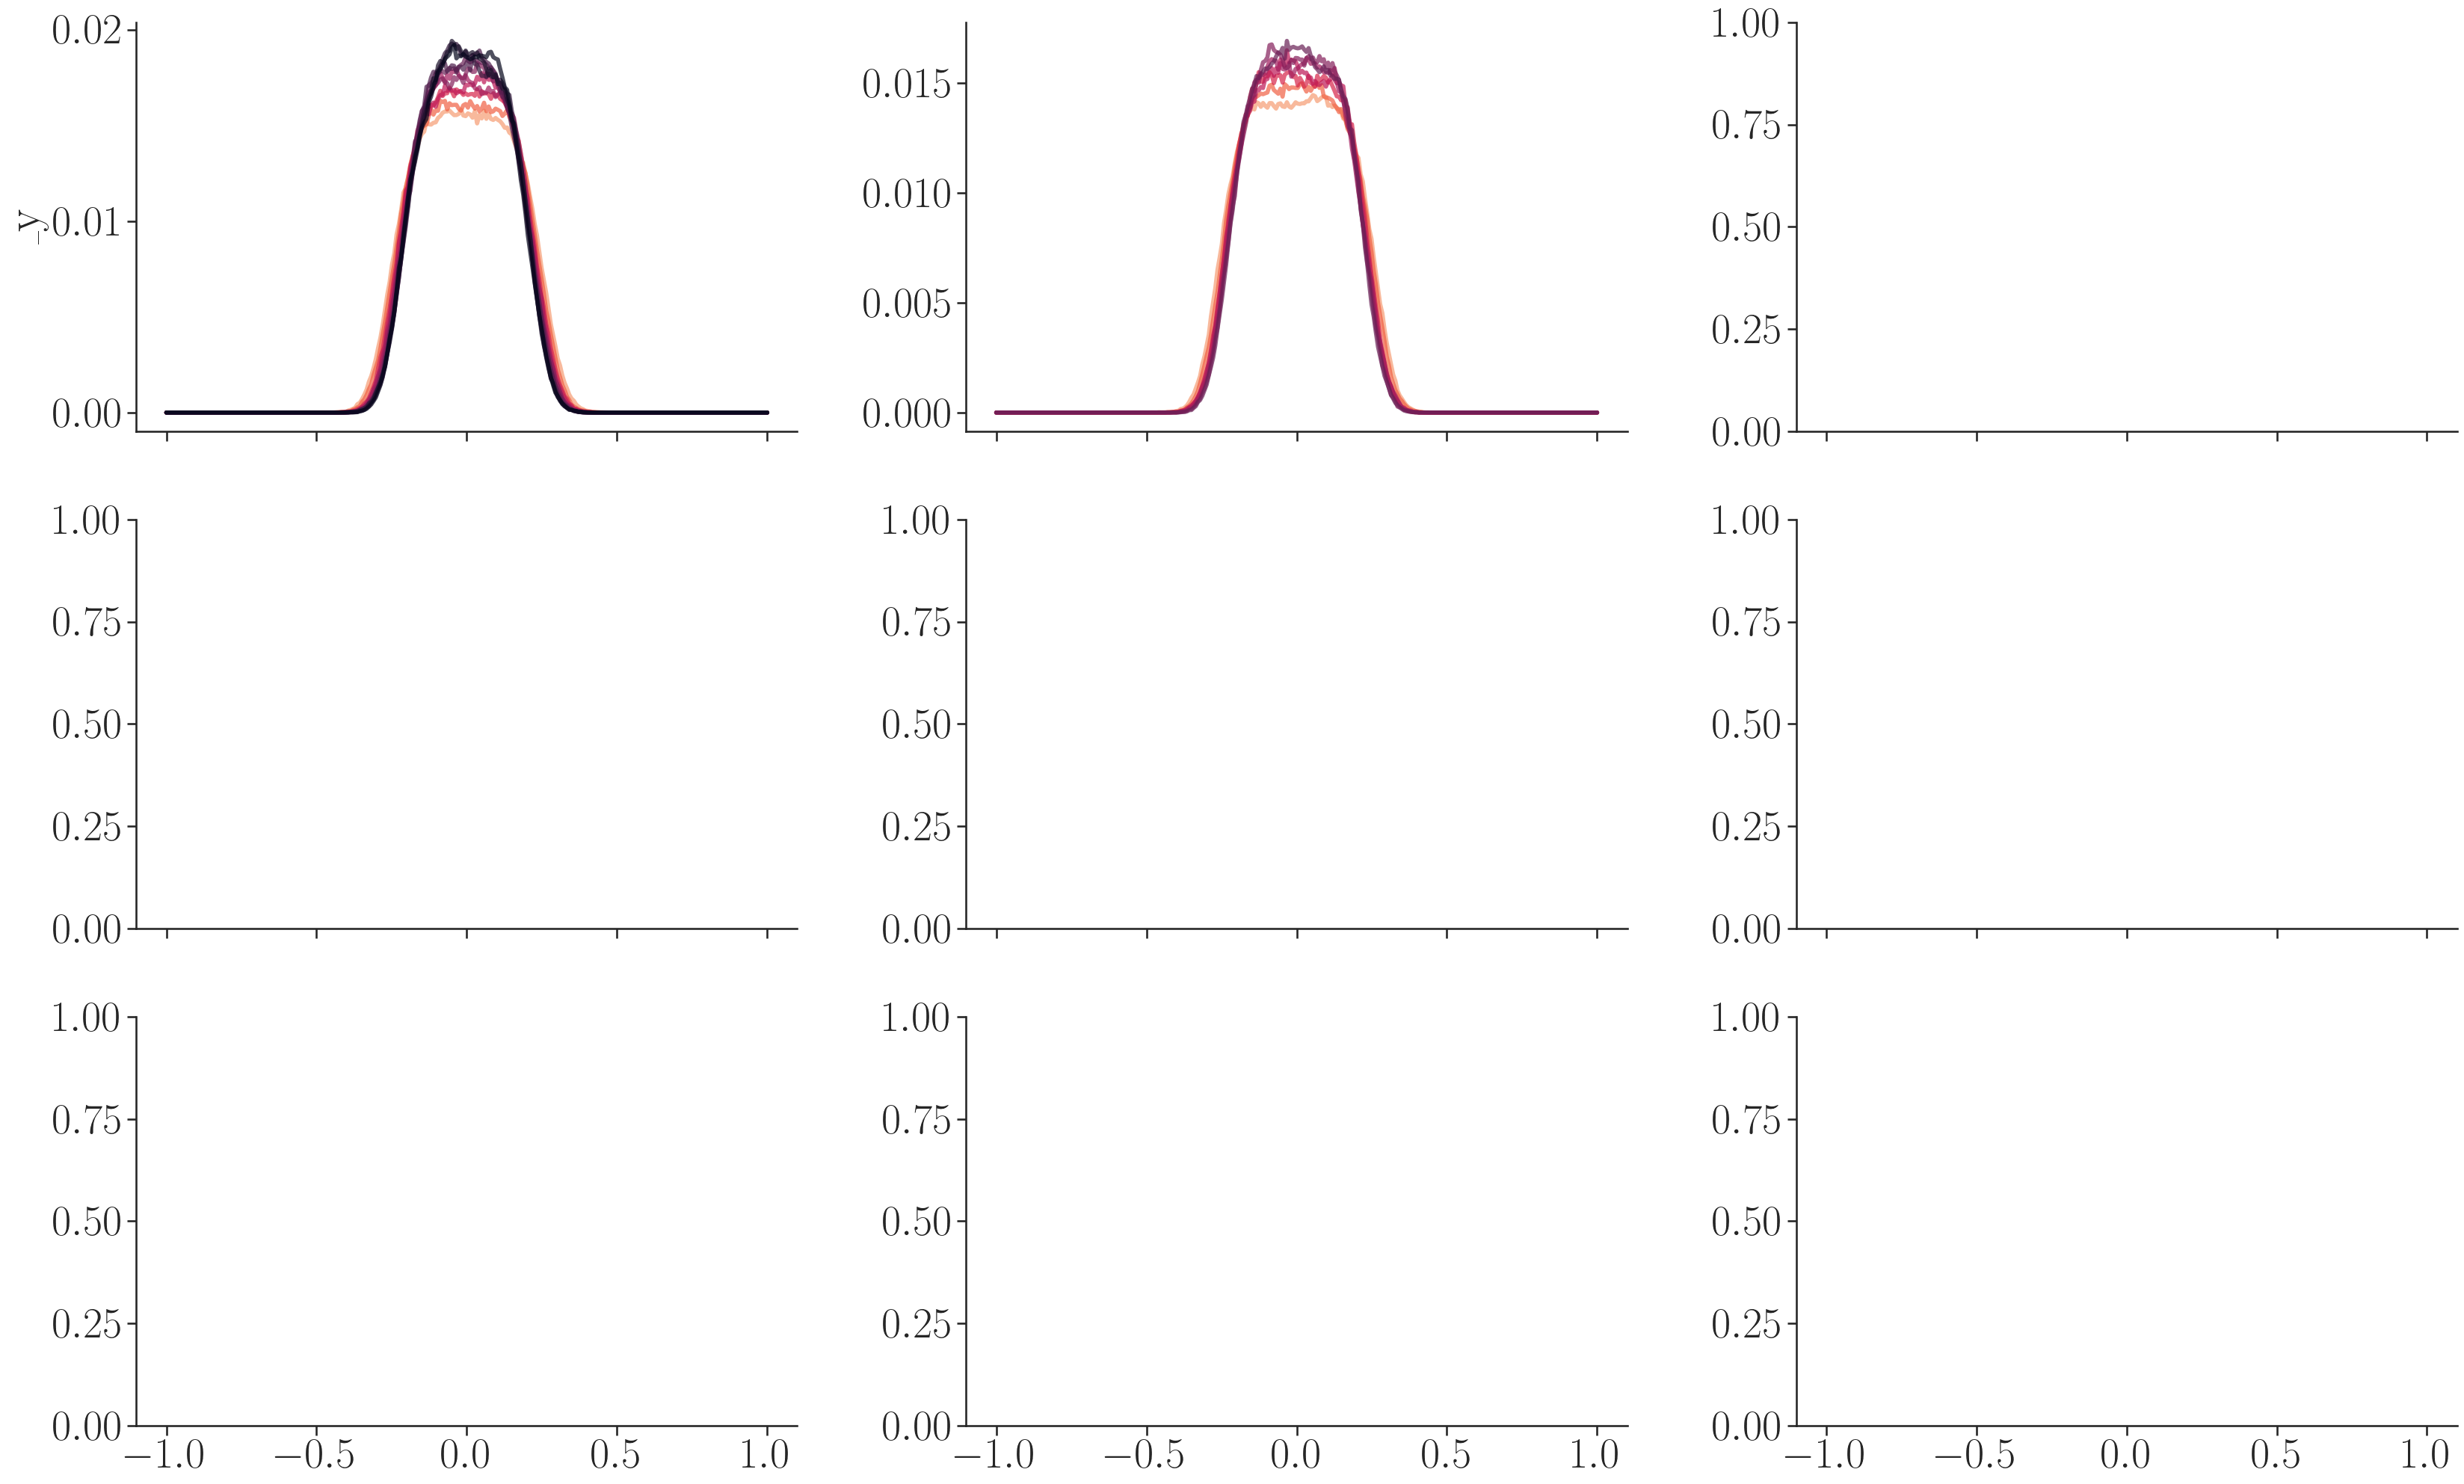

In [7]:
directions = ['z', 'r']
props = ['Phi', 'Rho']
species_list = ['Foci', 'Mon', 'Crd']
species_names = ['Large monomers', 'Small monomers', 'Crowders']
species_names_dict = dict(zip(species_list, species_names))
dir_prop_pairs = list(itertools.product(directions, props))
allInOne_db = '/Users/amirhsi_mini/research_data/analysis/'
group = 'all'
geometry = 'biaxial'
for direction, prop in dir_prop_pairs:
    prop_fullname = direction + prop
    equil_db = '-'.join(
        ['allInOne', project, group, direction + 'LocalDist.parquet.brotli']
    )
    equil_db = allInOne_db + equil_db
    local_dist = pd.read_parquet(equil_db)
    # dropping extra columns
    redundants = [
        'HistCrd-mean', 'HistCrd-var', 'HistCrd-sem', 'HistCrd-norm',
        'HistMon-mean', 'HistMon-var', 'HistMon-sem', 'HistMon-norm',
        'PhiCrd-var', 'PhiCrd-sem', 'PhiMon-var', 'PhiMon-sem', 
        'RhoCrd-var','RhoCrd-sem', 'RhoMon-var', 'RhoMon-sem'
    ]
    cols_to_drop = [direction + col for col in redundants]
    local_dist.drop(columns=cols_to_drop, inplace=True)
    # dropping crowders distributions with phi_c=0
    local_phi_c_cond = \
        (local_dist['phi_c_bulk_round'] == 0) & (local_dist[direction + prop +'Crd-mean'] == 0)
    local_dist = local_dist.loc[~local_phi_c_cond,:]
    # melting based on species:
    attributes = project_details[project]['equil_attributes'].copy()
    attributes = attributes + ['bin_center', 'bin_center-norm']
    hist_cols = list(set(local_dist.columns).difference(set(attributes)))
    hist_cols_norm = [col for col in hist_cols if col.endswith('norm')]
    prop_cols_norm = [col for col in hist_cols_norm if prop in col]
    sel_cols_norm = attributes + prop_cols_norm
    local_prop_norm = local_dist[sel_cols_norm].melt(
        id_vars=attributes,
        value_vars=prop_cols_norm,
        var_name=prop_fullname
    )
    # prop_fullname
    local_prop_norm.loc[:, prop_fullname] = \
        local_prop_norm.loc[:, prop_fullname].apply(
            lambda x: x.split('-')[0].split(prop_fullname)[-1]
    )
    local_prop_norm.loc[:, prop_fullname] = \
        local_prop_norm.loc[:, prop_fullname].apply(
            lambda x: species_names_dict[x]
    )
    # spaces
    spaces = local_prop_norm.loc[:,'space'].drop_duplicates().sort_values()
    spaces = sorted(spaces, key = organizer.sort_by_alphanumeric)
    project_titles = {}
    for space in spaces:
            s_info = project_details[project]['parser'](
                space,
                geometry=geometry,
                group=group,
                lineage='space',
                ispath=False
            )
            project_title_style = {
                #'SumRule': fr" $N={s_info.nmon}, {{D}}/{{a}}={s_info.dcyl}, {{a_c}}/{{a}}={s_info.dcrowd}$",
                'TransFoci': fr" $N_s={s_info.nmon_small}, N_l={s_info.nmon_large}, {{D}}/{{a}}={s_info.dcyl}, {{a_c}}/{{a}}={s_info.dcrowd}$"
                }
            project_titles[project] = project_title_style[project]
    # plotting style
    #species_order = [prop_fullname + species + '-norm' for species in species_list]
    ext = 'pdf'
    save_to = './'

    data = local_prop_norm
    
    species_legend = ['Particle type'] + species_names
    
    x_prop = 'bin_center-norm'
    x_prop_name = 'bin_center-norm' + '-' + direction
    y_prop = 'value'
    
    style_attr = prop_fullname
    style_order = species_names
    
    hue_attr = 'phi_c_bulk_round'
    hue_order = data[hue_attr].unique()
    hue_order.sort()
    
    col_attr = 'dmon_large'
    col_order = data[col_attr].unique()
    col_order.sort()
    
    row_attr = prop_fullname
    row_order = species_names
    
    color_palette = 'rocket_r'
    height = 7
    aspect = 1.618
    plot_context = 'talk'
    rc_params = {
            'mathtext.default': 'regular',
            'text.usetex': True
        }
    save_to = './'
    font_scale = 2.5
    fig_title_kws = {'x': 0.5, 'y': 0.96, 'ha': 'center'}
    facet_kws = {'sharey': False, 'sharex': True, 'legend_out': True}
    move_legend_kws = {'bbox_to_anchor': (0.85, 0.9)}
    sns.set_theme(
            context=plot_context,
            style='ticks',
            palette=color_palette,
            font='Times New Roman',
            font_scale=font_scale,
            rc=rc_params
        )
    tseries_grid = sns.relplot(
        data=data,
        x=x_prop,
        y=y_prop,
        style=style_attr,
        style_order=style_order,
        col=col_attr,
        col_order=col_order,
        row=row_attr,
        row_order=row_order,
        hue=hue_attr,
        hue_order=hue_order,
        kind='line',
        height=height,
        aspect=aspect,
        legend='full',
        palette=color_palette,
        facet_kws=facet_kws,
        alpha=0.7,
        lw=4,
        ci=None,
        )
    legend_labels = [attr_labels[hue_attr]] + list(hue_order) + species_legend
    for idx, new_label in enumerate(legend_labels):
        tseries_grid._legend.texts[idx].set_text(new_label)
    tseries_grid.set_ylabels(properties_labels[project][style_attr+'-norm']['symbol'])
    tseries_grid.set_xlabels(attr_labels[x_prop_name])
    tseries_grid.set_titles("{row_name} | " + attr_labels[col_attr] + r"$={col_name}$")
    tseries_grid.tight_layout(w_pad=1)
    sns.move_legend(tseries_grid, loc='upper left', **move_legend_kws)
    output = "-".join(["equilPlot", project, prop_fullname, 'LocalDist'])
    tseries_grid.savefig(save_to + output + '.' + ext, bbox_inches='tight')
    plt.close()

## Sum Rule equation: Different plotting styles for different projects

### Sum-rule  project

In [ ]:
directions = ['z', 'r']
props = ['Phi', 'Rho']
dir_prop_pairs = list(itertools.product(directions, props))

species_list = ['Mon', 'Crd']
# col to drops for each prop
measures = ['mean','sem', 'var']
ens_avg_measures = [
    species + '-' + col for species in species_list for col in measures
]
# attrs to add for each prop
melting_dict = {
'normalizer': [species + '-normalizer' for species in species_list],
'scaler': [species + '-scaler' for species in species_list],
'scale': [species + '-scale' for species in species_list],
'norm': [species + '-norm' for species in species_list],
'sumrule_constant': [species + '-sumrule_constant' for species in species_list]}

species_names = ['Monomers', 'Crowders']
species_names_dict = dict(zip(species_list, species_names))
allInOne_db = '/Users/amirhsi_mini/research_data/analysis/'
group = 'all'
geometry = 'biaxial'
for direction, prop in dir_prop_pairs:
    prop_fullname = direction + prop
    equil_db = '-'.join(['allInOne', project, group, prop_fullname])
    equil_db += '-NormalizedScaled.parquet.brotli'
    equil_db = allInOne_db + equil_db
    local_dist = pd.read_parquet(equil_db)
    # dropping extra columns
    cols_to_drop = [prop_fullname + redunt for redunt in ens_avg_measures]
    local_dist.drop(columns=cols_to_drop, inplace=True)
    # sumrule at local level
    local_dist[prop_fullname+'-sumrule_local'] = 0
    for species in species_list:
        local_dist[prop_fullname+'-sumrule_local'] += \
            local_dist[prop_fullname+species+'-norm']
    # modifyying crowders distributions with phi_c=0
    local_phi_c_cond = \
        (local_dist['phi_c_bulk_round'] == 0) & (local_dist[prop_fullname +'Crd-norm'] == 0)
    local_dist.loc[local_phi_c_cond,prop_fullname +'Crd-norm'] = 1.0
    # melting based on species:
    attributes = project_details[project]['equil_attributes'].copy()
    attributes += ['bin_center', 'bin_center-norm', prop_fullname+'-sumrule_local']
    local_dist_melted = []
    for var_name, melt_cols in melting_dict.items():
        var_cols = [prop_fullname + col for col in melt_cols]
        sel_cols = attributes + var_cols
        melted = local_dist[sel_cols].melt(
            id_vars=attributes,
            value_vars=var_cols,
            value_name=var_name+'_value',
            var_name=var_name
        )
        melted.loc[:, var_name] = \
        melted.loc[:, var_name].apply(
            lambda x: x.split('-')[0].split(prop_fullname)[-1]
        )
        melted.loc[:, var_name] = \
            melted.loc[:, var_name].apply(
                lambda x: species_names_dict[x]
        )
        local_dist_melted.append(melted)
    local_dist_melted = pd.concat(local_dist_melted, axis=1)
    local_dist_melted = \
        local_dist_melted.loc[:, ~local_dist_melted.columns.duplicated()]
    local_dist_melted.reset_index(inplace=True, drop=True)
    # spaces
    spaces = local_dist_melted.loc[:,'space'].drop_duplicates().sort_values()
    spaces = sorted(spaces, key = organizer.sort_by_alphanumeric)
    project_titles = {}
    for space in spaces:
            s_info = project_details[project]['parser'](
                space,
                geometry=geometry,
                group=group,
                lineage='space',
                ispath=False
            )
            project_title_style = {
                'SumRule': fr" $N={s_info.nmon}, {{D}}/{{a}}={s_info.dcyl}, {{a_c}}/{{a}}={s_info.dcrowd}$",
                #'TransFoci': fr" $N_s={s_info.nmon_small}, N_l={s_info.nmon_large}, {{D}}/{{a}}={s_info.dcyl}, {{a_c}}/{{a}}={s_info.dcrowd}$"
                }
            project_titles[project] = project_title_style[project]
    # plotting style
    ext = 'pdf'
    save_to = './'
    
    data = local_dist_melted
    var_col = 'norm'
    
    species_legend = ['Particle type'] + species_names
    
    x_prop = 'bin_center-norm'
    x_prop_name = 'bin_center-norm' + '-' + direction
    y_prop = var_col +'_value'
    
    style_attr = 'dcyl'
    style_order = data[style_attr].unique()
    style_order.sort()
    
    hue_attr = 'phi_c_bulk_round'
    hue_order = data[hue_attr].unique()
    hue_order.sort()
    
    col_attr = 'dcrowd'
    col_order = data[col_attr].unique()
    col_order.sort()
    
    row_attr = var_col
    row_order = species_names
    
    size_attr = 'nmon'
    size_order = data[size_attr].unique()
    size_order.sort()

    color_palette = 'rocket_r'
    height = 7
    aspect = 1.618
    plot_context = 'talk'
    rc_params = {
            'mathtext.default': 'regular',
            'text.usetex': True
        }
    save_to = './'
    font_scale = 2.5
    fig_title_kws = {'x': 0.5, 'y': 0.96, 'ha': 'center'}
    facet_kws = {'sharey': False, 'sharex': True, 'legend_out': True}
    move_legend_kws = {'bbox_to_anchor': (0.8, 1.0)}
    sns.set_theme(
            context=plot_context,
            style='ticks',
            palette=color_palette,
            font='Times New Roman',
            font_scale=font_scale,
            rc=rc_params
        )
    tseries_grid = sns.relplot(
        data=data,
        x=x_prop,
        y=y_prop,
        style=style_attr,
        style_order=style_order,
        size=size_attr,
        size_order=size_order,
        col=col_attr,
        col_order=col_order,
        row=row_attr,
        row_order=row_order,
        hue=hue_attr,
        hue_order=hue_order,
        kind='line',
        height=height,
        aspect=aspect,
        legend='full',
        palette=color_palette,
        facet_kws=facet_kws,
        alpha=0.7,
        lw=4,
        ci=None,
        )
    legend_labels =  [attr_labels[hue_attr]] + list(hue_order) +  [attr_labels[size_attr]] + list(size_order) + [attr_labels[style_attr]] + list(style_order)
    for idx, new_label in enumerate(legend_labels):
        tseries_grid._legend.texts[idx].set_text(new_label)
    tseries_grid.set_ylabels(properties_labels[project][prop_fullname+'-norm']['symbol'])
    tseries_grid.set_xlabels(attr_labels[x_prop_name])
    tseries_grid.set_titles(
        "{row_name} | " + attr_labels[col_attr] + r"$={col_name}$"
    )
    tseries_grid.tight_layout(w_pad=1)
    sns.move_legend(tseries_grid, loc='upper left', **move_legend_kws)
    output = "-".join(
        ["equilPlot", project, prop_fullname, 'NormalizedScaled']
    )
    tseries_grid.savefig(save_to + output + '.' + ext, bbox_inches='tight')
    plt.close()

### Trans-Foci

In [10]:
directions = ['z', 'r']
props = ['Phi', 'Rho']
dir_prop_pairs = list(itertools.product(directions, props))

species_list = ['Foci', 'Mon', 'Crd']
# col to drops for each prop
measures = ['mean','sem', 'var']
ens_avg_measures = [
    species + '-' + col for species in species_list for col in measures
]
# attrs to add for each prop
melting_dict = {
'normalizer': [species + '-normalizer' for species in species_list],
'scaler': [species + '-scaler' for species in species_list],
'scale': [species + '-scale' for species in species_list],
'norm': [species + '-norm' for species in species_list],
'sumrule_constant': [species + '-sumrule_constant' for species in species_list]}
species_names = ['Large monomers', 'Small monomers', 'Crowders']
species_names_dict = dict(zip(species_list, species_names))
allInOne_db = '/Users/amirhsi_mini/research_data/analysis/'
group = 'all'
geometry = 'biaxial'
for direction, prop in dir_prop_pairs:
    prop_fullname = direction + prop
    equil_db = '-'.join(['allInOne', project, group, prop_fullname])
    equil_db += '-NormalizedScaled.parquet.brotli'
    equil_db = allInOne_db + equil_db
    local_dist = pd.read_parquet(equil_db)
    # dropping extra columns
    cols_to_drop = [prop_fullname + redunt for redunt in ens_avg_measures]
    local_dist.drop(columns=cols_to_drop, inplace=True)
    # sumrule at local level
    local_dist[prop_fullname+'-sumrule_local'] = 0
    for species in species_list:
        local_dist[prop_fullname+'-sumrule_local'] += \
            local_dist[prop_fullname+species+'-norm']
    # modifyying crowders distributions with phi_c=0
    local_phi_c_cond = \
        (local_dist['phi_c_bulk_round'] == 0) & (local_dist[prop_fullname +'Crd-norm'] == 0)
    local_dist.loc[local_phi_c_cond,prop_fullname +'Crd-norm'] = 1.0
    # melting based on species:
    attributes = project_details[project]['equil_attributes'].copy()
    attributes += ['bin_center', 'bin_center-norm', prop_fullname+'-sumrule_local']
    local_dist_melted = []
    for var_name, melt_cols in melting_dict.items():
        var_cols = [prop_fullname + col for col in melt_cols]
        sel_cols = attributes + var_cols
        melted = local_dist[sel_cols].melt(
            id_vars=attributes,
            value_vars=var_cols,
            value_name=var_name+'_value',
            var_name=var_name
        )
        melted.loc[:, var_name] = \
        melted.loc[:, var_name].apply(
            lambda x: x.split('-')[0].split(prop_fullname)[-1]
        )
        melted.loc[:, var_name] = \
            melted.loc[:, var_name].apply(
                lambda x: species_names_dict[x]
        )
        local_dist_melted.append(melted)
    local_dist_melted = pd.concat(local_dist_melted, axis=1)
    local_dist_melted = \
        local_dist_melted.loc[:, ~local_dist_melted.columns.duplicated()]
    local_dist_melted.reset_index(inplace=True, drop=True)
    # spaces
    spaces = local_dist_melted.loc[:,'space'].drop_duplicates().sort_values()
    spaces = sorted(spaces, key = organizer.sort_by_alphanumeric)
    project_titles = {}
    for space in spaces:
            s_info = project_details[project]['parser'](
                space,
                geometry=geometry,
                group=group,
                lineage='space',
                ispath=False
            )
            project_title_style = {
                #'SumRule': fr" $N={s_info.nmon}, {{D}}/{{a}}={s_info.dcyl}, {{a_c}}/{{a}}={s_info.dcrowd}$",
                'TransFoci': fr" $N_s={s_info.nmon_small}, N_l={s_info.nmon_large}, {{D}}/{{a}}={s_info.dcyl}, {{a_c}}/{{a}}={s_info.dcrowd}$"
                }
            project_titles[project] = project_title_style[project]
    # plotting style
    ext = 'pdf'
    save_to = './'

    data = local_dist_melted
    var_col = 'norm'
    
    x_prop = 'bin_center-norm'
    x_prop_name = 'bin_center-norm' + '-' + direction
    y_prop = var_col+'_value'
    
    style_attr = var_col
    style_order = species_names
    
    hue_attr = 'phi_c_bulk_round'
    hue_order = data[hue_attr].unique()
    hue_order.sort()
    
    col_attr = 'dmon_large'
    col_order = data[col_attr].unique()
    col_order.sort()
    
    row_attr = var_col
    row_order = species_names
    
    color_palette = 'rocket_r'
    height = 7
    aspect = 1.618
    plot_context = 'talk'
    rc_params = {
            'mathtext.default': 'regular',
            'text.usetex': True
        }
    save_to = './'
    font_scale = 2.5
    fig_title_kws = {'x': 0.5, 'y': 0.96, 'ha': 'center'}
    facet_kws = {'sharey': False, 'sharex': True, 'legend_out': True}
    move_legend_kws = {'bbox_to_anchor': (0.85, 0.9)}
    sns.set_theme(
            context=plot_context,
            style='ticks',
            palette=color_palette,
            font='Times New Roman',
            font_scale=font_scale,
            rc=rc_params
        )
    tseries_grid = sns.relplot(
        data=data,
        x=x_prop,
        y=y_prop,
        style=style_attr,
        style_order=style_order,
        col=col_attr,
        col_order=col_order,
        row=row_attr,
        row_order=row_order,
        hue=hue_attr,
        hue_order=hue_order,
        kind='line',
        height=height,
        aspect=aspect,
        legend='full',
        palette=color_palette,
        facet_kws=facet_kws,
        alpha=0.7,
        lw=4,
        ci=None,
        )
    legend_labels = [attr_labels[hue_attr]] + list(hue_order) + species_legend
    for idx, new_label in enumerate(legend_labels):
        tseries_grid._legend.texts[idx].set_text(new_label)
    tseries_grid.set_ylabels(properties_labels[project][prop_fullname+'-norm']['symbol'])
    tseries_grid.set_xlabels(attr_labels[x_prop_name])
    tseries_grid.set_titles("{row_name} | " + attr_labels[col_attr] + r"$={col_name}$")
    tseries_grid.tight_layout(w_pad=1)
    sns.move_legend(tseries_grid, loc='upper left', **move_legend_kws)
    output = "-".join(
        ["equilPlot", project, prop_fullname, 'NormalizedScaled']
    )
    tseries_grid.savefig(save_to + output + '.' + ext, bbox_inches='tight')
    plt.close()